# Tarea 2 Astroinformática
#### Benjamín Mancilla

## Pregunta 1

Primero hacemos los imports y nos aseguramos de tener el archivo pickle en nuestra carpeta

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


### Parte a

In [3]:
# ruta relativa del archivo PICKLE
croosmatches_path = 'data/dfcrossmatches_small.pickle'

# leer el archivo PICKLE
# nota, se pudo hacer en una linea pero es mas legible escribir la ruta a parte
df_cm = pd.read_pickle(croosmatches_path)

# revisar el contenido del DataFrame
df_cm.head(10)

classALeRCE          ra        dec     period     source  \
oid                                                                     
ZTF18aaveffj         LPV  291.520423  21.930962        NaN  GAIADR2VS   
ZTF19aauyvnv         LPV  270.298238 -17.722810        NaN  GAIADR2VS   
ZTF18ablqvvc         RRL  271.180157  -6.556286        NaN  GAIADR2VS   
ZTF19abiblfd         RRL  268.188213 -17.161156        NaN  GAIADR2VS   
ZTF18acbvvku         AGN   48.110790  39.274936        NaN  MILLIQUAS   
ZTF20abntnko         QSO  327.714137  -1.979914        NaN  MILLIQUAS   
ZTF18acefhus         QSO  144.857074  11.377435        NaN  MILLIQUAS   
ZTF19aaocrrl         LPV  262.304261 -19.824542        NaN  GAIADR2VS   
ZTF18acusmwa         RRL  161.238890   2.381415  0.3233030  CRTSnorth   
ZTF20acgleua         RRL  272.770862  27.751032   0.333169  CRTSnorth   

                             id_source class_source  separation_arcsec  
oid                                                                     
ZTF18aaveffj     2018953972876187648.0      MIRA_SR           0.067312  
ZTF19aauyvnv     4143774487177066496.0      MIRA_SR           0.062104  
ZTF18ablqvvc     4171403011041441792.0         RRAB           0.095138  
ZTF19abiblfd     4144758786310249984.0         RRAB           0.043913  
ZTF18acbvvku                  4C 39.11            A           0.055433  
ZTF20abntnko  SDSS J215051.41-015847.5            Q           0.318817  
ZTF18acefhus  SDSS J093925.68+112238.6            Q           0.232170  
ZTF19aaocrrl     4121646506461783040.0      MIRA_SR           0.158164  
ZTF18acusmwa           1101058051006.0          RRc           0.633244  
ZTF20acgleua           1126088114634.0          RRc           1.297928

<Axes: title={'center': 'Distribución de clases en classALeRCE'}, xlabel='classALeRCE'>

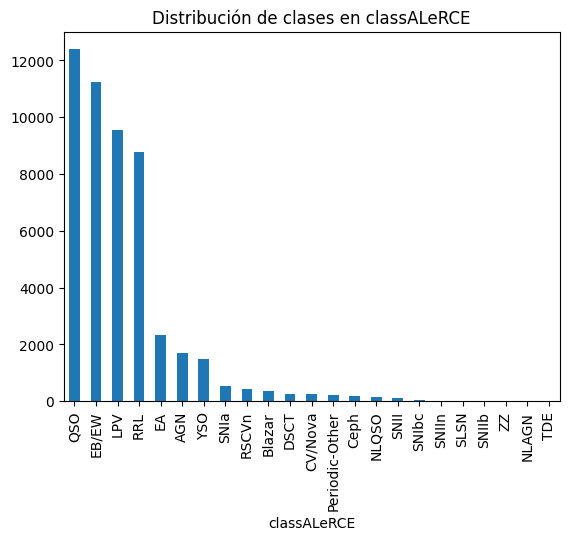

In [4]:
# extraemos solo la columna classALeRCE
classALeRCE = df_cm['classALeRCE']

# revisamos el recuento de las clases con el bar plot
classALeRCE.value_counts().plot(kind='bar', title='Distribución de clases en classALeRCE')

### Parte b

In [5]:
features_path = 'data/features_small.pickle'

# leer el archivo features
# nota, se pudo hacer en una linea pero es mas legible escribir la ruta a parte
df_features = pd.read_pickle(features_path)

In [6]:
# mostramos el contenido del DataFrame
df_features.head(10)

name     value  fid        version
oid                                                        
ZTF17aaaabrg        Amplitude  0.242504    1  feature_0.0.1
ZTF17aaaabrg        Amplitude  0.232499    2  feature_0.0.1
ZTF17aaaabrg  AndersonDarling  1.000000    1  feature_0.0.1
ZTF17aaaabrg  AndersonDarling  1.000000    2  feature_0.0.1
ZTF17aaaabrg   Autocor_length  1.000000    1  feature_0.0.1
ZTF17aaaabrg   Autocor_length  1.000000    2  feature_0.0.1
ZTF17aaaabrg       Beyond1Std  0.426471    1  feature_0.0.1
ZTF17aaaabrg       Beyond1Std  0.361446    2  feature_0.0.1
ZTF17aaaabrg              Con  0.000000    1  feature_0.0.1
ZTF17aaaabrg              Con  0.000000    2  feature_0.0.1

In [7]:
df_features_pivot = df_features.pivot(columns=['name', 'fid'], values='value')
df_features_pivot.head(10)

name         Amplitude           AndersonDarling           Autocor_length  \
fid                 1         2               1         2              1    
oid                                                                         
ZTF17aaaabrg  0.242504  0.232499             1.0  1.000000            1.0   
ZTF17aaaabtj  0.294114  0.216206             1.0  1.000000            1.0   
ZTF17aaaacml  0.179008  0.162632             1.0  1.000000            1.0   
ZTF17aaaacnc  0.199403  0.215955             1.0  0.999978            1.0   
ZTF17aaaacnt  0.671062  0.498549             1.0  0.775576            1.0   
ZTF17aaaacnw  1.507676  1.277175             1.0  1.000000            6.0   
ZTF17aaaacsb  0.738301  0.628361             1.0  0.999990            1.0   
ZTF17aaaactj  0.791632  0.699808             1.0  0.995246            1.0   
ZTF17aaaacvj       NaN  0.026539             NaN  0.903415            NaN   
ZTF17aaaadic  0.752120  0.558424             1.0  1.000000            1.0   

name              Beyond1Std                 Con            ...       Std  \
fid            2          1         2         1         2   ...        2    
oid                                                         ...             
ZTF17aaaabrg  1.0   0.426471  0.361446  0.000000  0.000000  ...  0.164944   
ZTF17aaaabtj  1.0   0.489510  0.390909  0.000000  0.009259  ...  0.119271   
ZTF17aaaacml  1.0   0.403846  0.229508  0.000000  0.000000  ...  0.115176   
ZTF17aaaacnc  1.0   0.062500  0.350000  0.000000  0.000000  ...  0.102518   
ZTF17aaaacnt  1.0   0.242105  0.298246  0.000000  0.000000  ...  0.271919   
ZTF17aaaacnw  5.0   0.330579  0.365217  0.016807  0.008850  ...  0.742491   
ZTF17aaaacsb  1.0   0.349515  0.280000  0.000000  0.000000  ...  0.364837   
ZTF17aaaactj  1.0   0.321782  0.303136  0.000000  0.000000  ...  0.365500   
ZTF17aaaacvj  1.0        NaN  0.200000       NaN  0.000000  ...  0.014371   
ZTF17aaaadic  1.0   0.515873  0.516129  0.000000  0.000000  ...  0.379751   

name          StetsonK           g-W2 g-W3 Power_rate r-W2 r-W3 W1-W2 W2-W3  
fid                 1         2    0    0          12   0    0     0     0   
oid                                                                          
ZTF17aaaabrg  0.912734  0.958511  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaabtj  0.967987  0.758365  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaacml  0.946447  0.786144  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaacnc  0.525565  0.786877  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaacnt  0.820105  0.772239  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaacnw  0.915576  0.904754  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaacsb  0.902400  0.866680  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaactj  0.864476  0.821592  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaacvj       NaN  0.753027  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaadic  0.915598  0.927487  NaN  NaN        NaN  NaN  NaN   NaN   NaN  

[10 rows x 179 columns]

In [8]:
# Notemos que el DataFrame df_features_pivot tiene un MultiIndex, por lo que obtener un
# elemento de la columna es un poco mas complicado
# Obtengamos el valor numero 54 de la columna 'Amplitude' y el fid 2

single_element = df_features_pivot[('Amplitude', 2)].iloc[54]
single_element

0.39581298828125

In [9]:

# Obtengamos ahora las features pero el canal 1 del indice ZTF19aaocrrl
index_element = df_features_pivot.xs(1, level='fid', axis=1).loc['ZTF18aaveffj']
index_element

name
Amplitude           0.264278
AndersonDarling     0.999210
Autocor_length      6.000000
Beyond1Std          0.248276
Con                 0.006993
                     ...    
SPM_t0             43.767362
SPM_tau_fall       99.996600
SPM_tau_rise       78.851569
Std                 0.139909
StetsonK            0.808636
Name: ZTF18aaveffj, Length: 78, dtype: float64

### Parte c

In [10]:
# Mostramos las media para cada columna
median_values = df_features_pivot.median(axis=0)
print(median_values.to_string())
print('--'*40)

df_features_pivot = df_features_pivot.fillna(median_values)


name                          fid
Amplitude                     1          0.402083
                              2          0.341036
AndersonDarling               1          0.999934
                              2          0.999747
Autocor_length                1          1.000000
                              2          1.000000
Beyond1Std                    1          0.329268
                              2          0.325000
Con                           1          0.000000
                              2          0.000000
delta_mag_fid                 1          0.824751
                              2          0.671815
delta_mjd_fid                 1        815.898438
                              2        812.726562
delta_period                  1          0.000000
                              2          0.000000
dmag_first_det_fid            1          1.866055
                              2          2.715409
dmag_non_det_fid              1          2.405147
                

### Parte d

In [11]:
# Concatenamos el pivote y las labels (crossmatches)
# Notemos que el pivote hacer la relacion con las labels sea
# uno a uno, por lo que la concatenacion es directa en el eje 1
df_final = pd.concat([df_features_pivot, classALeRCE], axis=1)

# Mostramos el DataFrame final
# Usamos solo las clases de alerce ya que es como nuestro dato Y
# (etiqueta), el resto son atributos que no importan para el entrenamiento
df_final.head(10)


(Amplitude, 1)  (Amplitude, 2)  (AndersonDarling, 1)  \
oid                                                                  
ZTF17aaaabrg        0.242504        0.232499              1.000000   
ZTF17aaaabtj        0.294114        0.216206              1.000000   
ZTF17aaaacml        0.179008        0.162632              1.000000   
ZTF17aaaacnc        0.199403        0.215955              1.000000   
ZTF17aaaacnt        0.671062        0.498549              1.000000   
ZTF17aaaacnw        1.507676        1.277175              1.000000   
ZTF17aaaacsb        0.738301        0.628361              1.000000   
ZTF17aaaactj        0.791632        0.699808              1.000000   
ZTF17aaaacvj        0.402083        0.026539              0.999934   
ZTF17aaaadic        0.752120        0.558424              1.000000   

              (AndersonDarling, 2)  (Autocor_length, 1)  (Autocor_length, 2)  \
oid                                                                            
ZTF17aaaabrg              1.000000                  1.0                  1.0   
ZTF17aaaabtj              1.000000                  1.0                  1.0   
ZTF17aaaacml              1.000000                  1.0                  1.0   
ZTF17aaaacnc              0.999978                  1.0                  1.0   
ZTF17aaaacnt              0.775576                  1.0                  1.0   
ZTF17aaaacnw              1.000000                  6.0                  5.0   
ZTF17aaaacsb              0.999990                  1.0                  1.0   
ZTF17aaaactj              0.995246                  1.0                  1.0   
ZTF17aaaacvj              0.903415                  1.0                  1.0   
ZTF17aaaadic              1.000000                  1.0                  1.0   

              (Beyond1Std, 1)  (Beyond1Std, 2)  (Con, 1)  (Con, 2)  ...  \
oid                                                                 ...   
ZTF17aaaabrg         0.426471         0.361446  0.000000  0.000000  ...   
ZTF17aaaabtj         0.489510         0.390909  0.000000  0.009259  ...   
ZTF17aaaacml         0.403846         0.229508  0.000000  0.000000  ...   
ZTF17aaaacnc         0.062500         0.350000  0.000000  0.000000  ...   
ZTF17aaaacnt         0.242105         0.298246  0.000000  0.000000  ...   
ZTF17aaaacnw         0.330579         0.365217  0.016807  0.008850  ...   
ZTF17aaaacsb         0.349515         0.280000  0.000000  0.000000  ...   
ZTF17aaaactj         0.321782         0.303136  0.000000  0.000000  ...   
ZTF17aaaacvj         0.329268         0.200000  0.000000  0.000000  ...   
ZTF17aaaadic         0.515873         0.516129  0.000000  0.000000  ...   

              (StetsonK, 1)  (StetsonK, 2)  (g-W2, 0)  (g-W3, 0)  \
oid                                                                
ZTF17aaaabrg       0.912734       0.958511   4.943869   7.820271   
ZTF17aaaabtj       0.967987       0.758365   4.943869   7.820271   
ZTF17aaaacml       0.946447       0.786144   4.943869   7.820271   
ZTF17aaaacnc       0.525565       0.786877   4.943869   7.820271   
ZTF17aaaacnt       0.820105       0.772239   4.943869   7.820271   
ZTF17aaaacnw       0.915576       0.904754   4.943869   7.820271   
ZTF17aaaacsb       0.902400       0.866680   4.943869   7.820271   
ZTF17aaaactj       0.864476       0.821592   4.943869   7.820271   
ZTF17aaaacvj       0.834742       0.753027   4.943869   7.820271   
ZTF17aaaadic       0.915598       0.927487   4.943869   7.820271   

              (Power_rate, 12)  (r-W2, 0)  (r-W3, 0)  (W1-W2, 0)  (W2-W3, 0)  \
oid                                                                            
ZTF17aaaabrg          0.029785   4.645677   7.501856       0.559       2.527   
ZTF17aaaabtj          0.029785   4.645677   7.501856       0.559       2.527   
ZTF17aaaacml          0.029785   4.645677   7.501856       0.559       2.527   
ZTF17aaaacnc          0.029785   4.645677   7.501856       0.559       2.527   
ZTF17aaaacnt  

In [12]:
df_final = df_final.dropna()
df_final


(Amplitude, 1)  (Amplitude, 2)  (AndersonDarling, 1)  \
oid                                                                  
ZTF17aaaabrg        0.242504        0.232499              1.000000   
ZTF17aaaabtj        0.294114        0.216206              1.000000   
ZTF17aaaacml        0.179008        0.162632              1.000000   
ZTF17aaaacnc        0.199403        0.215955              1.000000   
ZTF17aaaacnt        0.671062        0.498549              1.000000   
...                      ...             ...                   ...   
ZTF21abkjyui        0.683250        0.341036              0.677959   
ZTF21abkndcw        0.617332        0.341036              0.989514   
ZTF21abknlix        0.077879        0.075038              0.520365   
ZTF21abkrimu        0.402083        0.402185              0.999934   
ZTF21abkylyc        0.402083        0.369650              0.999934   

              (AndersonDarling, 2)  (Autocor_length, 1)  (Autocor_length, 2)  \
oid                                                                            
ZTF17aaaabrg              1.000000                  1.0                  1.0   
ZTF17aaaabtj              1.000000                  1.0                  1.0   
ZTF17aaaacml              1.000000                  1.0                  1.0   
ZTF17aaaacnc              0.999978                  1.0                  1.0   
ZTF17aaaacnt              0.775576                  1.0                  1.0   
...                            ...                  ...                  ...   
ZTF21abkjyui              0.999747                  1.0                  1.0   
ZTF21abkndcw              0.999747                  1.0                  1.0   
ZTF21abknlix              0.386736                  3.0                  1.0   
ZTF21abkrimu              1.000000                  1.0                  1.0   
ZTF21abkylyc              0.576287                  1.0                  1.0   

              (Beyond1Std, 1)  (Beyond1Std, 2)  (Con, 1)  (Con, 2)  ...  \
oid                                                                 ...   
ZTF17aaaabrg         0.426471         0.361446       0.0  0.000000  ...   
ZTF17aaaabtj         0.489510         0.390909       0.0  0.009259  ...   
ZTF17aaaacml         0.403846         0.229508       0.0  0.000000  ...   
ZTF17aaaacnc         0.062500         0.350000       0.0  0.000000  ...   
ZTF17aaaacnt         0.242105         0.298246       0.0  0.000000  ...   
...                       ...              ...       ...       ...  ...   
ZTF21abkjyui         0.333333         0.325000       0.0  0.000000  ...   
ZTF21abkndcw         0.166667         0.325000       0.0  0.000000  ...   
ZTF21abknlix         0.416667         0.285714       0.0  0.000000  ...   
ZTF21abkrimu         0.329268         0.322581       0.0  0.000000  ...   
ZTF21abkylyc         0.329268         0.250000       0.0  0.000000  ...   

              (StetsonK, 1)  (StetsonK, 2)  (g-W2, 0)  (g-W3, 0)  \
oid                                                                
ZTF17aaaabrg       0.912734       0.958511   4.943869   7.820271   
ZTF17aaaabtj       0.967987       0.758365   4.943869   7.820271   
ZTF17aaaacml       0.946447       0.786144   4.943869   7.820271   
ZTF17aaaacnc       0.525565       0.786877   4.943869   7.820271   
ZTF17aaaacnt       0.820105       0.772239   4.943869   7.820271   
...                     ...            ...        ...        ...   
ZTF21abkjyui       0.808906       0.825233   4.943869   7.820271   
ZTF21abkndcw       0.777093       0.825233   2.248809   4.216808   
ZTF21abknlix       0.839430       0.776154   8.182998   8.388997   
ZTF21abkrimu       0.834742       0.850610   4.943869   7.820271   
ZTF21abkylyc       0.834742       0.886870   4.943869   7.820271   

              (Power_rate, 12)  (r-W2, 0)  (r-W3, 0)  (W1-W2, 0)  (W2-W3, 0)  \
oid                                                                            
ZTF17aaaabrg          0.029785   4.645677

### Parte e

<Axes: title={'center': 'Distribución de clases en el dataset final'}, xlabel='classALeRCE'>

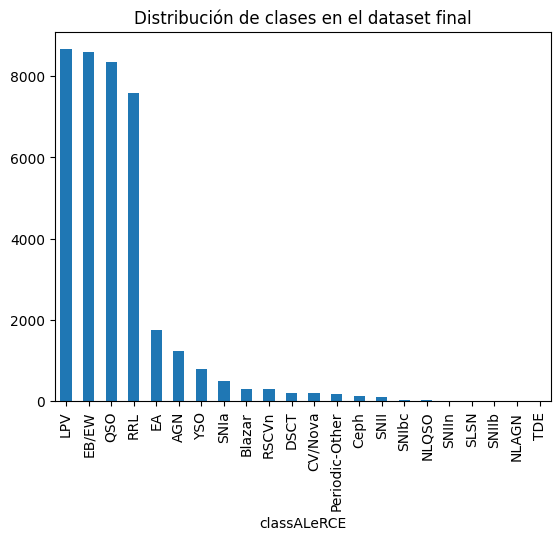

In [13]:
df_final['classALeRCE'].value_counts().plot(kind='bar', title='Distribución de clases en el dataset final')


### Parte f

In [ ]:
# remplazamos las etiquetas "EB/EW" y "EA" por "EB"
df_final = df_final.replace({'classALeRCE': {'EB/EW': 'EB', 'EA': 'EB'}})

# Dropeamos las clases "NLAGN", "NLQSO", "TDE" y "ZZ"
df_final = df_final.loc[~df_final['classALeRCE'].isin(['NLAGN', 'NLQSO', 'TDE', 'ZZ'])]
df_final

(Amplitude, 1)  (Amplitude, 2)  (AndersonDarling, 1)  \
oid                                                                  
ZTF17aaaabrg        0.242504        0.232499              1.000000   
ZTF17aaaabtj        0.294114        0.216206              1.000000   
ZTF17aaaacml        0.179008        0.162632              1.000000   
ZTF17aaaacnc        0.199403        0.215955              1.000000   
ZTF17aaaacnt        0.671062        0.498549              1.000000   
...                      ...             ...                   ...   
ZTF21abkjyui        0.683250        0.341036              0.677959   
ZTF21abkndcw        0.617332        0.341036              0.989514   
ZTF21abknlix        0.077879        0.075038              0.520365   
ZTF21abkrimu        0.402083        0.402185              0.999934   
ZTF21abkylyc        0.402083        0.369650              0.999934   

              (AndersonDarling, 2)  (Autocor_length, 1)  (Autocor_length, 2)  \
oid                                                                            
ZTF17aaaabrg              1.000000                  1.0                  1.0   
ZTF17aaaabtj              1.000000                  1.0                  1.0   
ZTF17aaaacml              1.000000                  1.0                  1.0   
ZTF17aaaacnc              0.999978                  1.0                  1.0   
ZTF17aaaacnt              0.775576                  1.0                  1.0   
...                            ...                  ...                  ...   
ZTF21abkjyui              0.999747                  1.0                  1.0   
ZTF21abkndcw              0.999747                  1.0                  1.0   
ZTF21abknlix              0.386736                  3.0                  1.0   
ZTF21abkrimu              1.000000                  1.0                  1.0   
ZTF21abkylyc              0.576287                  1.0                  1.0   

              (Beyond1Std, 1)  (Beyond1Std, 2)  (Con, 1)  (Con, 2)  ...  \
oid                                                                 ...   
ZTF17aaaabrg         0.426471         0.361446       0.0  0.000000  ...   
ZTF17aaaabtj         0.489510         0.390909       0.0  0.009259  ...   
ZTF17aaaacml         0.403846         0.229508       0.0  0.000000  ...   
ZTF17aaaacnc         0.062500         0.350000       0.0  0.000000  ...   
ZTF17aaaacnt         0.242105         0.298246       0.0  0.000000  ...   
...                       ...              ...       ...       ...  ...   
ZTF21abkjyui         0.333333         0.325000       0.0  0.000000  ...   
ZTF21abkndcw         0.166667         0.325000       0.0  0.000000  ...   
ZTF21abknlix         0.416667         0.285714       0.0  0.000000  ...   
ZTF21abkrimu         0.329268         0.322581       0.0  0.000000  ...   
ZTF21abkylyc         0.329268         0.250000       0.0  0.000000  ...   

              (StetsonK, 1)  (StetsonK, 2)  (g-W2, 0)  (g-W3, 0)  \
oid                                                                
ZTF17aaaabrg       0.912734       0.958511   4.943869   7.820271   
ZTF17aaaabtj       0.967987       0.758365   4.943869   7.820271   
ZTF17aaaacml       0.946447       0.786144   4.943869   7.820271   
ZTF17aaaacnc       0.525565       0.786877   4.943869   7.820271   
ZTF17aaaacnt       0.820105       0.772239   4.943869   7.820271   
...                     ...            ...        ...        ...   
ZTF21abkjyui       0.808906       0.825233   4.943869   7.820271   
ZTF21abkndcw       0.777093       0.825233   2.248809   4.216808   
ZTF21abknlix       0.839430       0.776154   8.182998   8.388997   
ZTF21abkrimu       0.834742       0.850610   4.943869   7.820271   
ZTF21abkylyc       0.834742       0.886870   4.943869   7.820271   

              (Power_rate, 12)  (r-W2, 0)  (r-W3, 0)  (W1-W2, 0)  (W2-W3, 0)  \
oid                                                                            
ZTF17aaaabrg          0.029785   4.645677

### Parte g

In [15]:
X = df_final.drop(columns=['classALeRCE'])
y = df_final['classALeRCE']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Parte h

In [16]:
X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=X.columns,
    index=X.index
)

print("X_scaled shape:", X_scaled.shape)
print("y shape:       ", y.shape)
X_scaled_df

X_scaled shape: (38981, 179)
y shape:        (38981,)


(Amplitude, 1)  (Amplitude, 2)  (AndersonDarling, 1)  \
oid                                                                  
ZTF17aaaabrg       -0.592315       -0.529016              0.494203   
ZTF17aaaabtj       -0.477272       -0.570538              0.494203   
ZTF17aaaacml       -0.733853       -0.707072              0.494203   
ZTF17aaaacnc       -0.688390       -0.571180              0.494203   
ZTF17aaaacnt        0.362972        0.149012              0.494201   
...                      ...             ...                   ...   
ZTF21abkjyui        0.390139       -0.252409             -1.073460   
ZTF21abkndcw        0.243203       -0.252409              0.443158   
ZTF21abknlix       -0.959276       -0.930307             -1.840613   
ZTF21abkrimu       -0.236602       -0.096569              0.493883   
ZTF21abkylyc       -0.236602       -0.179487              0.493883   

              (AndersonDarling, 2)  (Autocor_length, 1)  (Autocor_length, 2)  \
oid                                                                            
ZTF17aaaabrg              0.497912            -0.412377            -0.373345   
ZTF17aaaabtj              0.497912            -0.412377            -0.373345   
ZTF17aaaacml              0.497912            -0.412377            -0.373345   
ZTF17aaaacnc              0.497807            -0.412377            -0.373345   
ZTF17aaaacnt             -0.589384            -0.412377            -0.373345   
...                            ...                  ...                  ...   
ZTF21abkjyui              0.496688            -0.412377            -0.373345   
ZTF21abkndcw              0.496688            -0.412377            -0.373345   
ZTF21abknlix             -2.473242             0.131216            -0.373345   
ZTF21abkrimu              0.497912            -0.412377            -0.373345   
ZTF21abkylyc             -1.554902            -0.412377            -0.373345   

              (Beyond1Std, 1)  (Beyond1Std, 2)  (Con, 1)  (Con, 2)  ...  \
oid                                                                 ...   
ZTF17aaaabrg         0.963531         0.402816 -0.218764 -0.207622  ...   
ZTF17aaaabtj         1.602910         0.726254 -0.218764  0.866539  ...   
ZTF17aaaacml         0.734064        -1.045545 -0.218764 -0.207622  ...   
ZTF17aaaacnc        -2.728023         0.277169 -0.218764 -0.207622  ...   
ZTF17aaaacnt        -0.906385        -0.290972 -0.218764 -0.207622  ...   
...                       ...              ...       ...       ...  ...   
ZTF21abkjyui         0.018891         0.002728 -0.218764 -0.207622  ...   
ZTF21abkndcw        -1.671518         0.002728 -0.218764 -0.207622  ...   
ZTF21abknlix         0.864095        -0.428536 -0.218764 -0.207622  ...   
ZTF21abkrimu        -0.022339        -0.023831 -0.218764 -0.207622  ...   
ZTF21abkylyc        -0.022339        -0.820594 -0.218764 -0.207622  ...   

              (Std, 2)  (StetsonK, 1)  (StetsonK, 2)  (g-W2, 0)  (g-W3, 0)  \
oid                                                                          
ZTF17aaaabrg -0.422102       1.027619       1.721674  -0.022746   0.085608   
ZTF17aaaabtj -0.616817       1.735939      -0.806356  -0.022746   0.085608   
ZTF17aaaacml -0.634276       1.459804      -0.455484  -0.022746   0.085608   
ZTF17aaaacnc -0.688239      -3.935648      -0.446229  -0.022746   0.085608   
ZTF17aaaacnt  0.033963      -0.159818      -0.631118  -0.022746   0.085608   
...                ...            ...            ...        ...        ...   
ZTF21abkjyui -0.217913      -0.303392       0.038247  -0.022746   0.085608   
ZTF21abkndcw -0.217913      -0.711209       0.038247  -2.991881  -3.630741   
ZTF21abknlix -0.916879       0.087911      -0.581661   3.545787   0.672150   
ZTF21abkrimu  0.018688       0.027814       0.358786  -0.022746   0.085608   
ZTF21abkylyc -0.102733       0.027814       0.816787  -0.022746   0.085608   

              (Power_rate, 12)  (r-W2, 0)  (r-W3, 0)  (W1-W2, 0)  (W2-W

## Pregunta 2

### Parte a

In [17]:
corr_matrix = X_scaled_df.corr()

# 2. Muestra la matriz
corr_matrix

(Amplitude, 1)  (Amplitude, 2)  (AndersonDarling, 1)  \
(Amplitude, 1)              1.000000        0.763315              0.222978   
(Amplitude, 2)              0.763315        1.000000              0.127166   
(AndersonDarling, 1)        0.222978        0.127166              1.000000   
(AndersonDarling, 2)        0.133968        0.181049              0.224768   
(Autocor_length, 1)         0.217770        0.160384              0.102254   
...                              ...             ...                   ...   
(Power_rate, 12)           -0.039896       -0.034513             -0.091230   
(r-W2, 0)                   0.016080        0.028852             -0.048938   
(r-W3, 0)                   0.025156        0.033531             -0.044100   
(W1-W2, 0)                 -0.095886       -0.071685             -0.157328   
(W2-W3, 0)                 -0.015797       -0.011150             -0.042658   

                      (AndersonDarling, 2)  (Autocor_length, 1)  \
(Amplitude, 1)                    0.133968             0.217770   
(Amplitude, 2)                    0.181049             0.160384   
(AndersonDarling, 1)              0.224768             0.102254   
(AndersonDarling, 2)              1.000000             0.064116   
(Autocor_length, 1)               0.064116             1.000000   
...                                    ...                  ...   
(Power_rate, 12)                 -0.098903             0.000615   
(r-W2, 0)                        -0.063471             0.019670   
(r-W3, 0)                        -0.052574             0.052237   
(W1-W2, 0)                       -0.105241             0.010708   
(W2-W3, 0)                       -0.043262             0.046132   

                      (Autocor_length, 2)  (Beyond1Std, 1)  (Beyond1Std, 2)  \
(Amplitude, 1)                   0.182256         0.131465         0.095067   
(Amplitude, 2)                   0.277421         0.060371         0.078710   
(AndersonDarling, 1)             0.091480         0.059413         0.093994   
(AndersonDarling, 2)             0.096671         0.107319         0.023112   
(Autocor_length, 1)              0.715328         0.030875         0.017649   
...                                   ...              ...              ...   
(Power_rate, 12)                -0.011392        -0.058241        -0.043630   
(r-W2, 0)                        0.020892        -0.023646        -0.014410   
(r-W3, 0)                        0.047832        -0.011768        -0.001184   
(W1-W2, 0)                      -0.000433        -0.052828        -0.021992   
(W2-W3, 0)                       0.040124        -0.001873         0.006681   

                      (Con, 1)  (Con, 2)  ...  (Std, 2)  (StetsonK, 1)  \
(Amplitude, 1)        0.130499  0.106837  ...  0.747561       0.016919   
(Amplitude, 2)        0.088903  0.156584  ...  0.980034      -0.000038   
(AndersonDarling, 1)  0.099596  0.068264  ...  0.135960       0.062996   
(AndersonDarling, 2)  0.068420  0.094482  ...  0.199517       0.092680   
(Autocor_length, 1)   0.283169  0.247833  ...  0.144606      -0.035981   
...                        ...       ...  ...       ...            ...   
(Power_rate, 12)     -0.015395 -0.013997  ... -0.034846      -0.031337   
(r-W2, 0)             0.010813  0.008113  ...  0.024934      -0.033828   
(r-W3, 0)             0.029521  0.024204  ...  0.025372      -0.042271   
(W1-W2, 0)            0.002459 -0.001815  ... -0.079035      -0.061237   
(W2-W3, 0)            0.027019  0.022342  ... -0.019141      -0.026465   

                      (StetsonK, 2)  (g-W2, 0)  (g-W3, 0)  (Power_rate, 12)  \
(Amplitude, 1)            -0.037457   0.018508   0.028537         -0.039896   
(Amplitude, 2)            -0.026274   0.015411   0.025055         -0.034513   
(AndersonDarling, 1)       0.053263  -0.061262  -0.049110         -0.091230   
(AndersonDarling, 2)       0.021385  -0.033134  -0.041703         -0.098903   
(Autocor_length, 1)       -0.100929   0.014271 

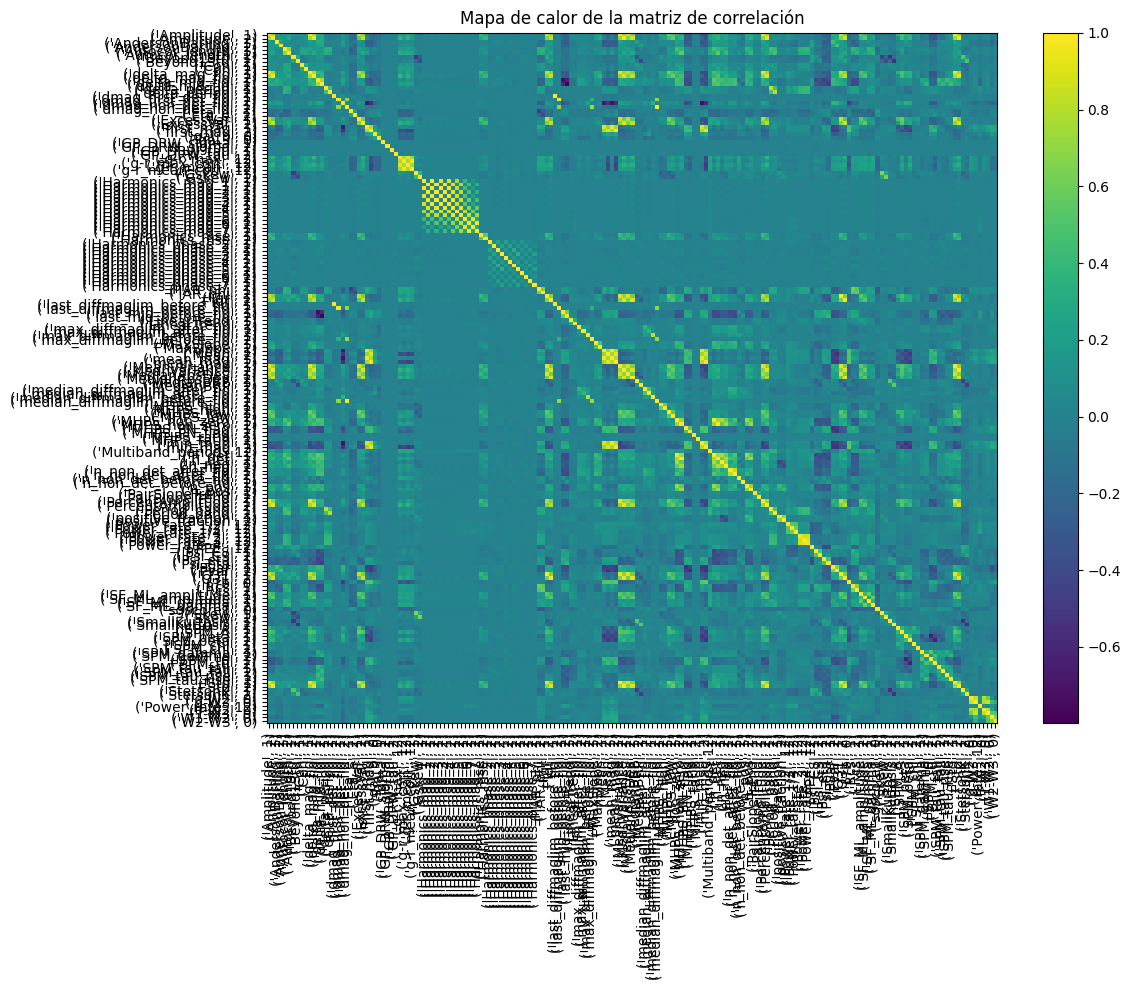

In [18]:
# Mostramos la matriz de correlación, pero como se tienen
# muchas features con muchos canales los ejes se ven horribles xD
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Mapa de calor de la matriz de correlación")
plt.tight_layout()
plt.show()

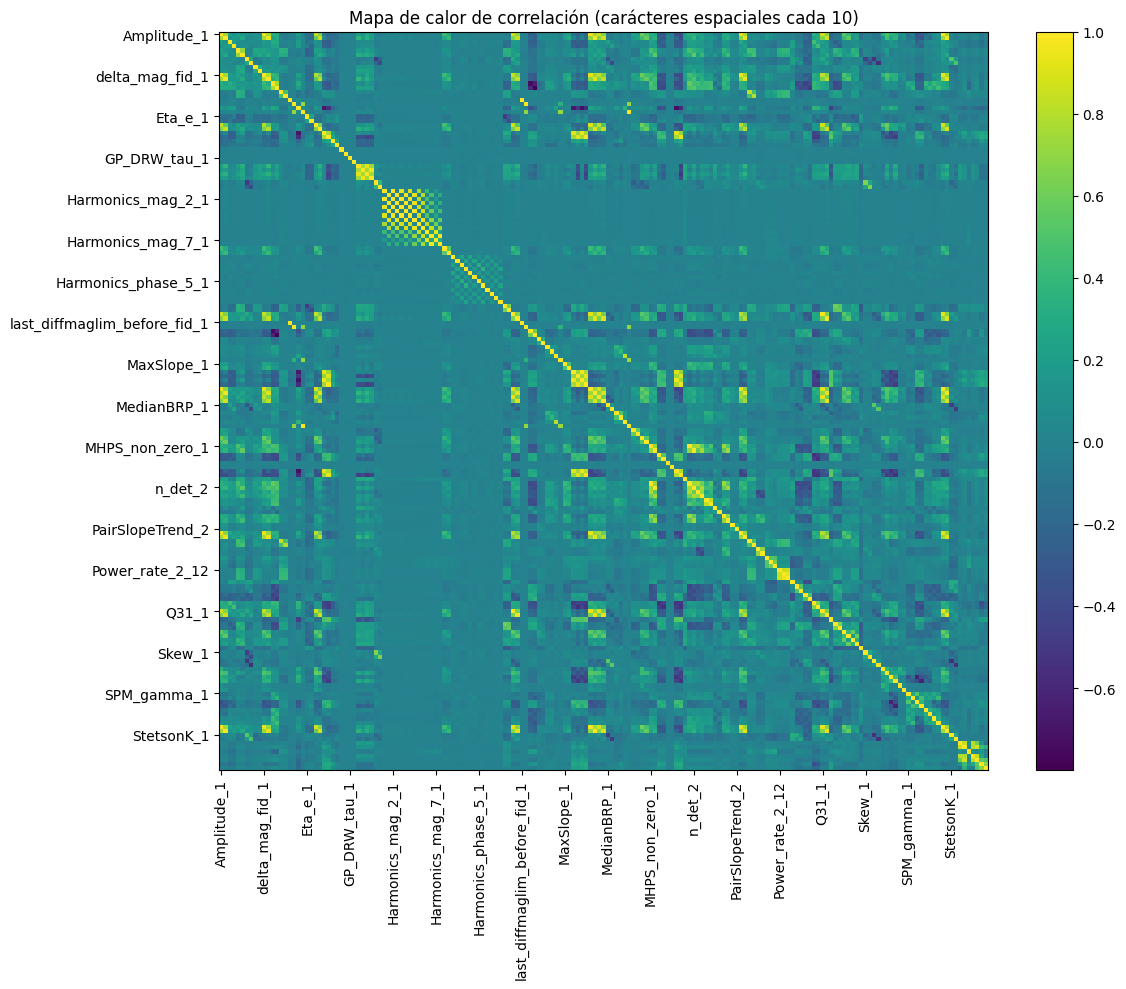

In [19]:
# OPCIONAL, ESTO NO SE PIDE EN EL ENUNCIADO
# Vamos a aplanar el daaframe para que las columnas sean
# 'name_fid' y no (name, fid)
df_flat = X_scaled_df.copy()
df_flat.columns = [f"{name}_{fid}" for name, fid in df_flat.columns]

# Calculamos la matriz de correlación aplanada
corr = df_flat.corr()

plt.figure(figsize=(12,10))
plt.imshow(corr, aspect='auto')
plt.colorbar()

# para no escribir 179 etiquetas, marcamos sólo cada 10 en los ejes
# Esto pierde un poco de información, pero es más legible
step = 10
labels = corr.columns
plt.xticks(range(0, len(labels), step), labels[::step], rotation=90)
plt.yticks(range(0, len(labels), step), labels[::step])

plt.title("Mapa de calor de correlación (carácteres espaciales cada 10)")
plt.tight_layout()
plt.show()

### Parte b

In [25]:
sample = (
    df_final
    .groupby('classALeRCE', group_keys=False)
    .apply(lambda grp: grp.sample(n=min(len(grp), 10), random_state=42))
)

sample

C:\Users\benja\AppData\Local\Temp\ipykernel_18356\2784759122.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: grp.sample(n=min(len(grp), 10), random_state=42))


(Amplitude, 1)  (Amplitude, 2)  (AndersonDarling, 1)  \
oid                                                                  
ZTF19aajwokh        0.036198        0.042323              0.316671   
ZTF18acuejcm        0.146433        0.065217              1.000000   
ZTF18acnbgpv        0.919030        0.610198              1.000000   
ZTF18aakaxav        0.402083        0.126856              0.999934   
ZTF18aaqkopk        0.098924        0.054416              0.997060   
...                      ...             ...                   ...   
ZTF20acucezm        0.402083        0.341036              0.999934   
ZTF20aaunfvu        0.402083        0.166693              0.999934   
ZTF18abgzcul        0.402083        0.200992              0.999934   
ZTF18abbmxzg        0.477691        0.455183              1.000000   
ZTF20acnjcgl        0.402083        0.499800              0.999934   

              (AndersonDarling, 2)  (Autocor_length, 1)  (Autocor_length, 2)  \
oid                                                                            
ZTF19aajwokh              0.280869                  1.0                  1.0   
ZTF18acuejcm              1.000000                  2.0                  1.0   
ZTF18acnbgpv              1.000000                 17.0                 14.0   
ZTF18aakaxav              1.000000                  1.0                  1.0   
ZTF18aaqkopk              0.997073                  3.0                  1.0   
...                            ...                  ...                  ...   
ZTF20acucezm              0.999747                  1.0                  1.0   
ZTF20aaunfvu              0.936572                  1.0                  1.0   
ZTF18abgzcul              0.817385                  1.0                  1.0   
ZTF18abbmxzg              1.000000                 13.0                 14.0   
ZTF20acnjcgl              0.988458                  1.0                  6.0   

              (Beyond1Std, 1)  (Beyond1Std, 2)  (Con, 1)  (Con, 2)  ...  \
oid                                                                 ...   
ZTF19aajwokh         0.428571         0.300000  0.000000   0.00000  ...   
ZTF18acuejcm         0.057692         0.078947  0.000000   0.00000  ...   
ZTF18acnbgpv         0.477273         0.444444  0.000000   0.00000  ...   
ZTF18aakaxav         0.329268         0.090909  0.000000   0.00000  ...   
ZTF18aaqkopk         0.300000         0.314286  0.016949   0.00000  ...   
...                       ...              ...       ...       ...  ...   
ZTF20acucezm         0.329268         0.325000  0.000000   0.00000  ...   
ZTF20aaunfvu         0.329268         0.444444  0.000000   0.00000  ...   
ZTF18abgzcul         0.329268         0.300000  0.000000   0.00000  ...   
ZTF18abbmxzg         0.186667         0.205202  0.036913   0.05814  ...   
ZTF20acnjcgl         0.329268         0.458333  0.000000   0.00000  ...   

              (StetsonK, 1)  (StetsonK, 2)  (g-W2, 0)  (g-W3, 0)  \
oid                                                                
ZTF19aajwokh       0.812440       0.769251   6.149141   9.190141   
ZTF18acuejcm       0.505191       0.603321   4.943869   7.820271   
ZTF18acnbgpv       0.880712       0.905388   4.943869   7.820271   
ZTF18aakaxav       0.834742       0.594819   4.943869   7.820271   
ZTF18aaqkopk       0.761704       0.860398   4.943869   7.820271   
...                     ...            ...        ...        ...   
ZTF20acucezm       0.834742       0.825233   5.282910   6.986910   
ZTF20aaunfvu       0.834742       0.888605   4.943869   7.820271   
ZTF18abgzcul       0.834742       0.835736   4.943869   7.820271   
ZTF18abbmxzg       0.721425       0.746903   4.943869   7.820271   
ZTF20acnjcgl       0.834742       0.848659   4.943869   7.820271   

              (Power_rate, 12)  (r-W2, 0)  (r-W3, 0)  (W1-W2, 0)  (W2-W3, 0)  \
oid                                                                            
ZTF19aajwokh          0.063805   5.459011

Con alerce ya instalado lo importamos y utilizamos.
Iniciamos el cliente, luego, recorremos grupo a grupo la sample,por cada grupo llamamos el cliente entre 10 a min(sample) (llamemos este numero m), ya que no todas las clases tienen 10 o mas fuentes clasificadas, luego le pedimos al cliente m curvas de luz y graficamos.

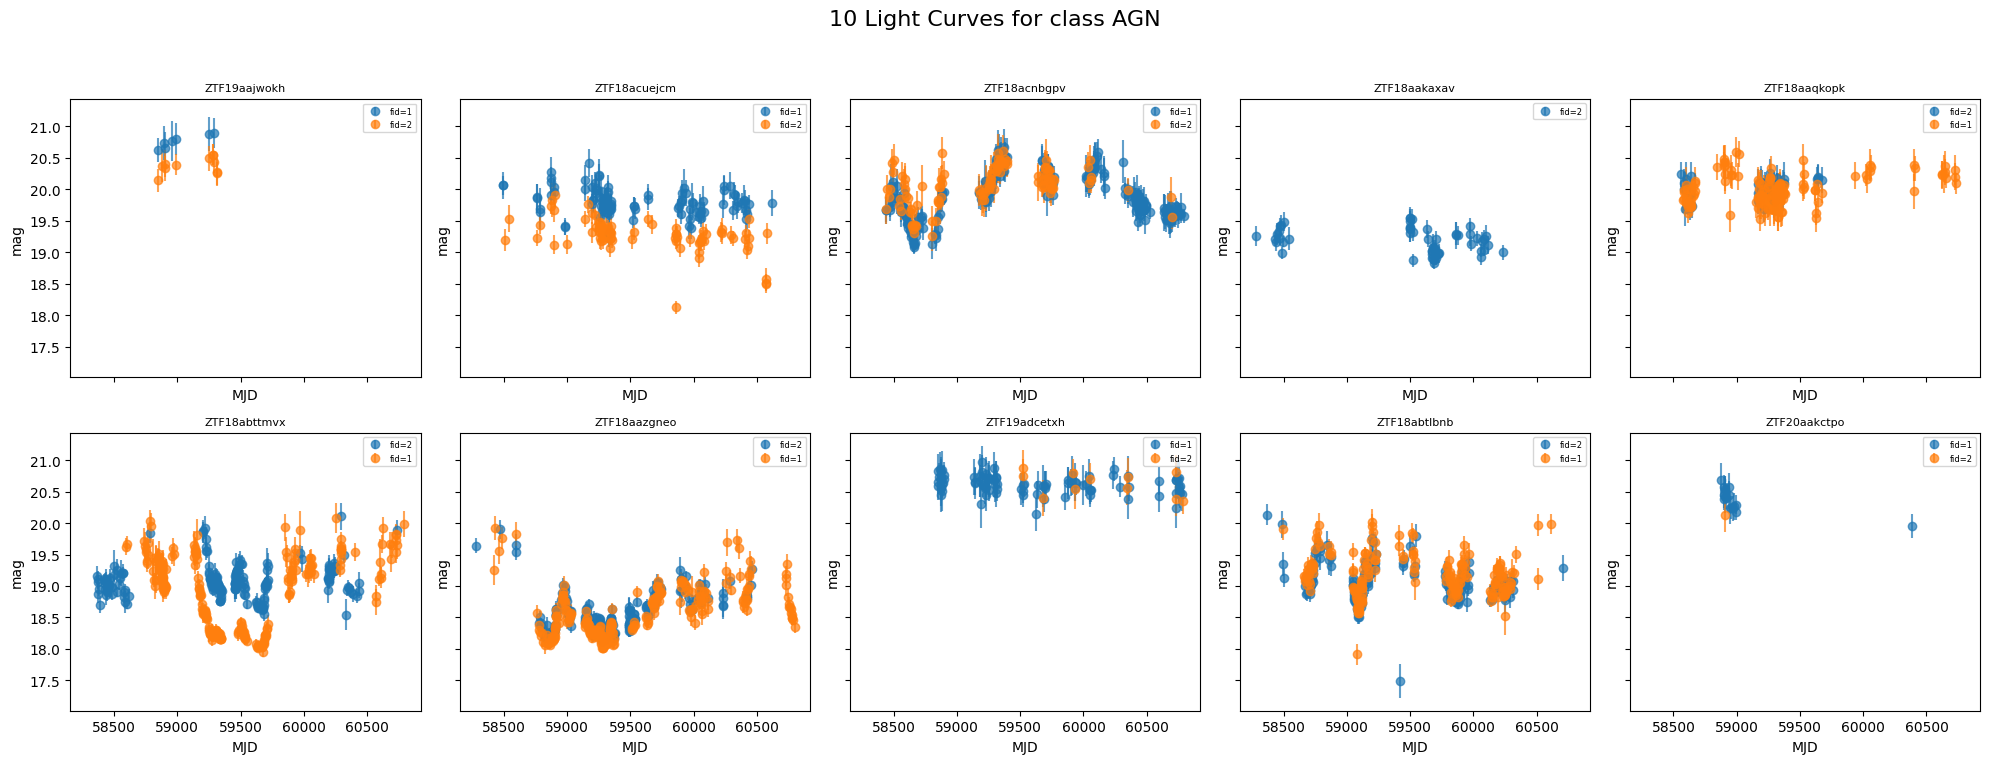

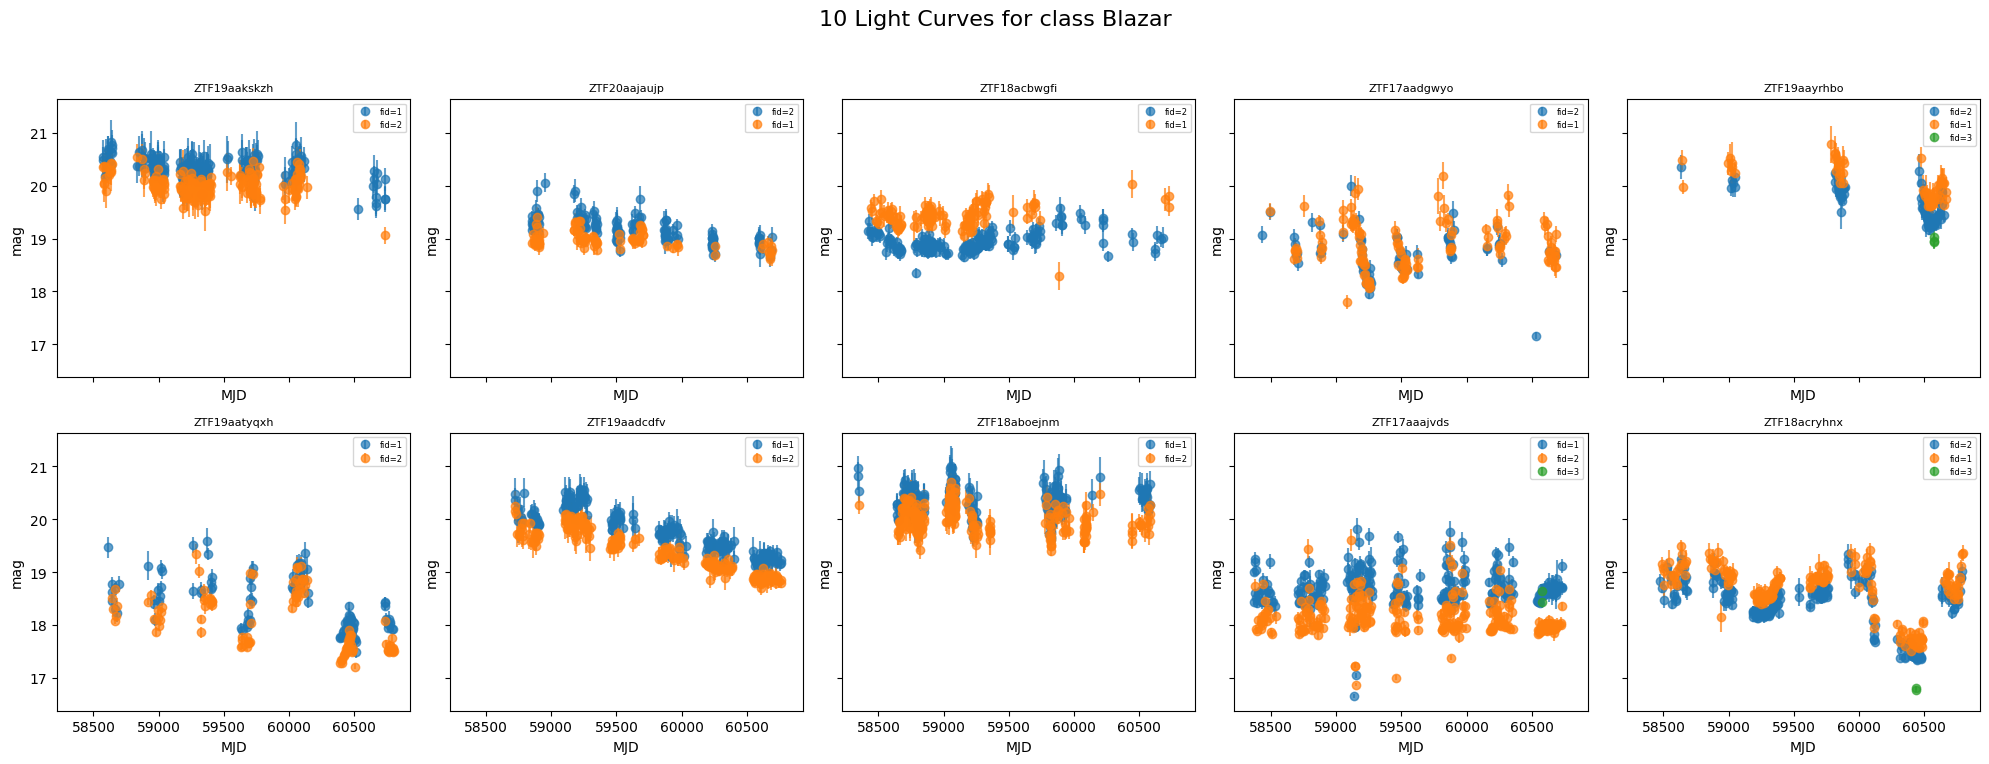

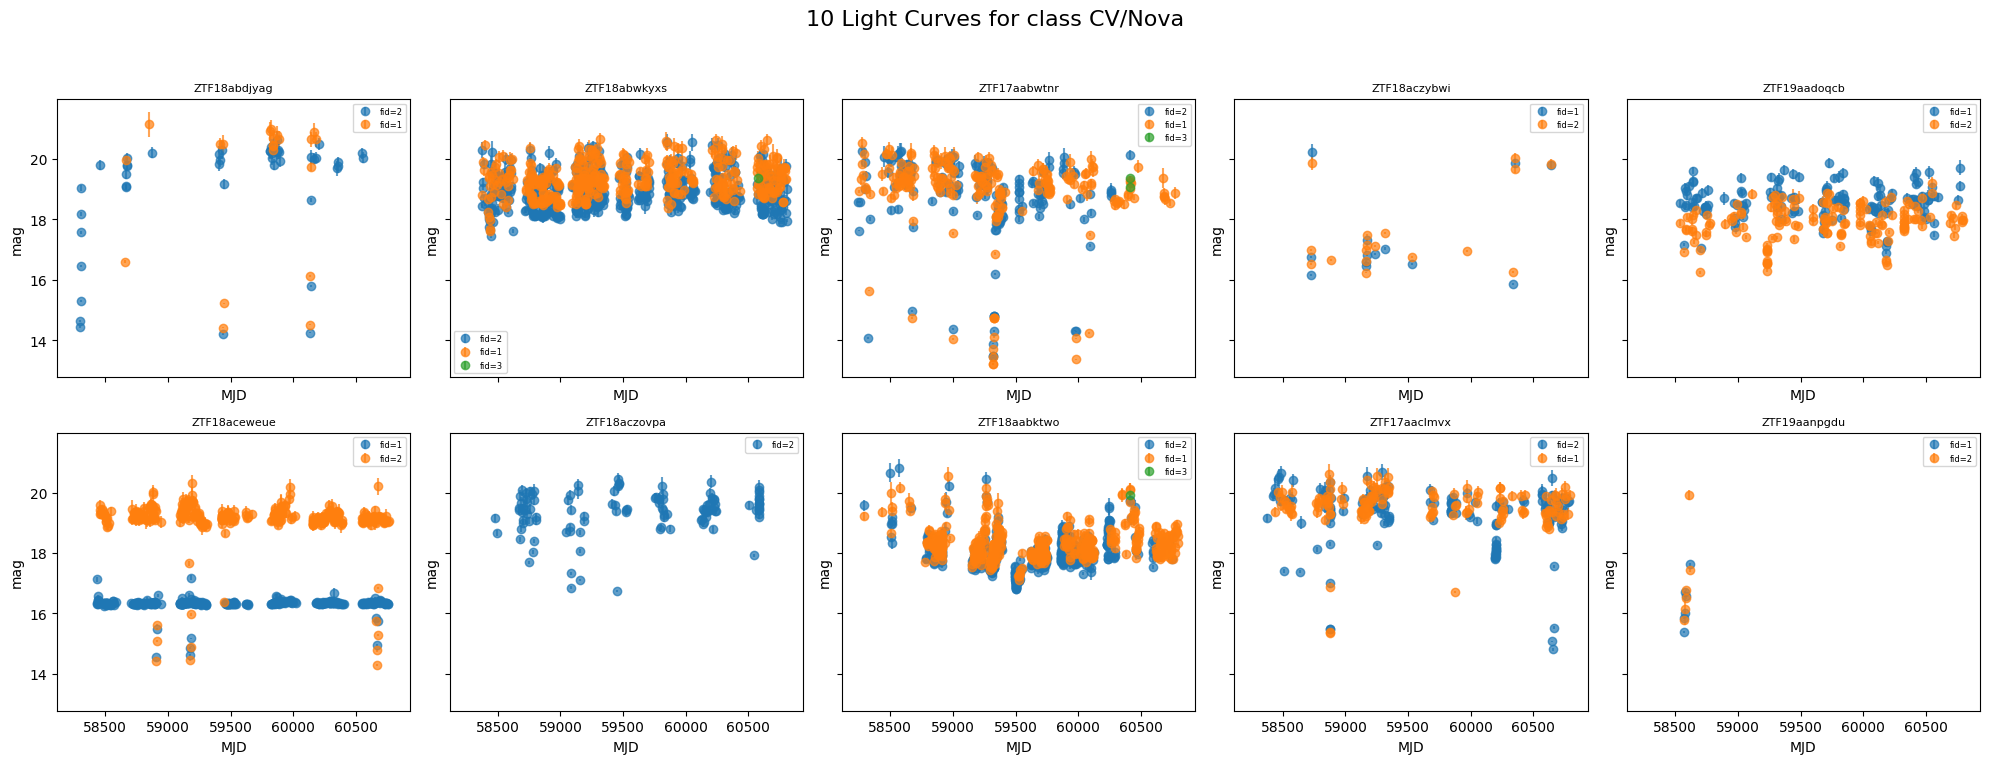

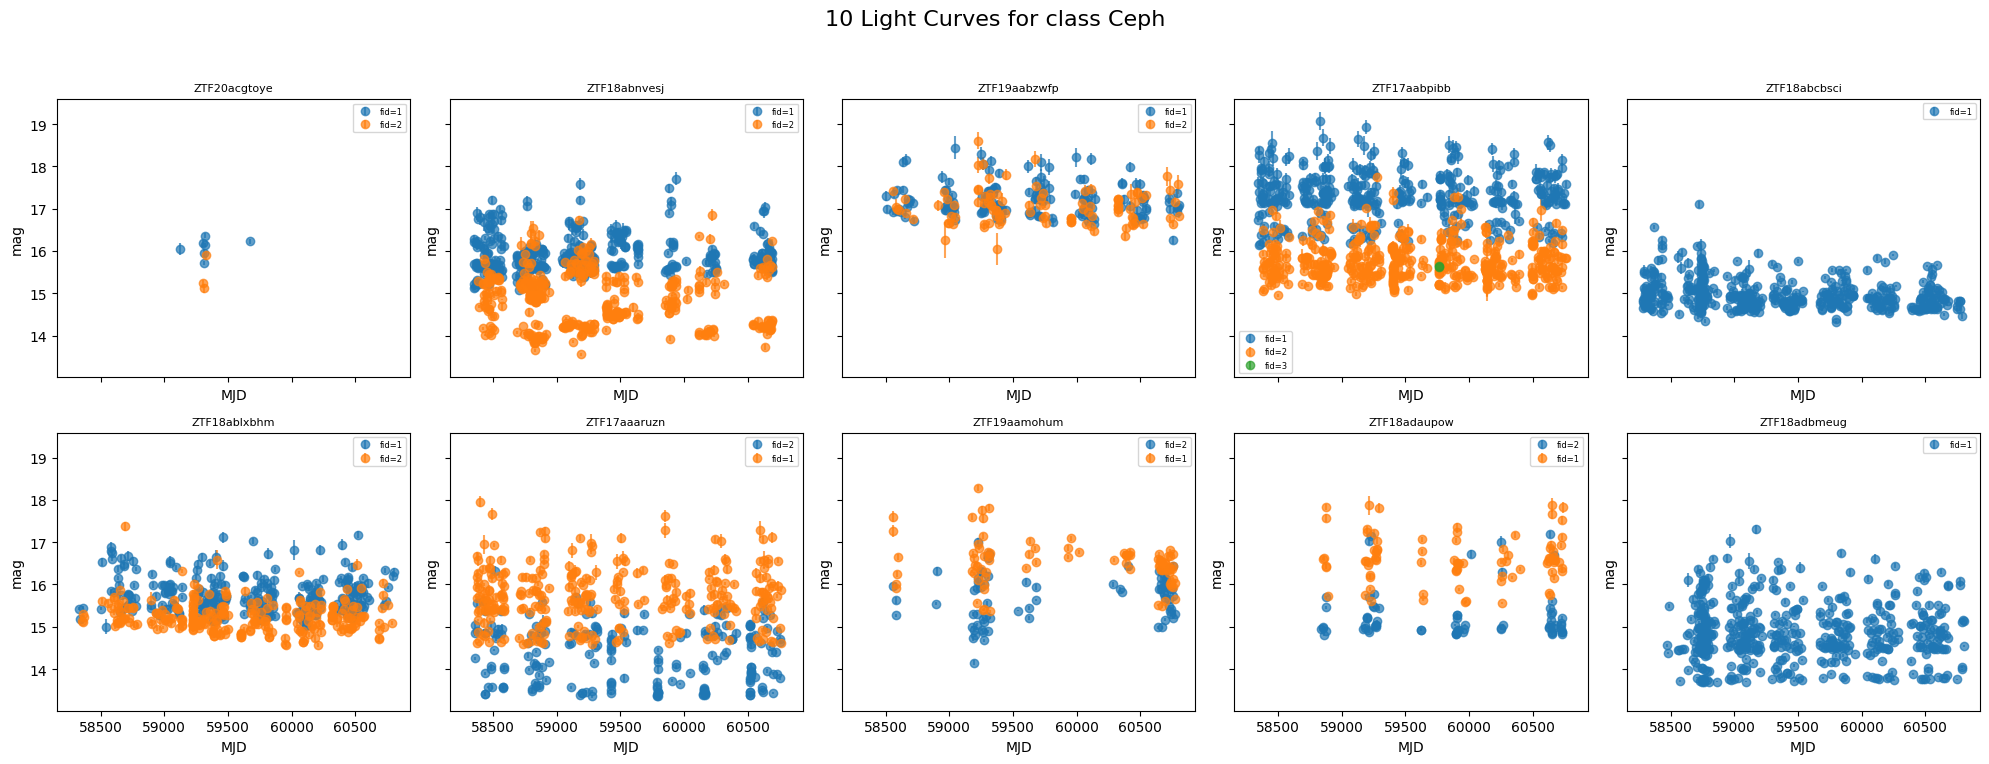

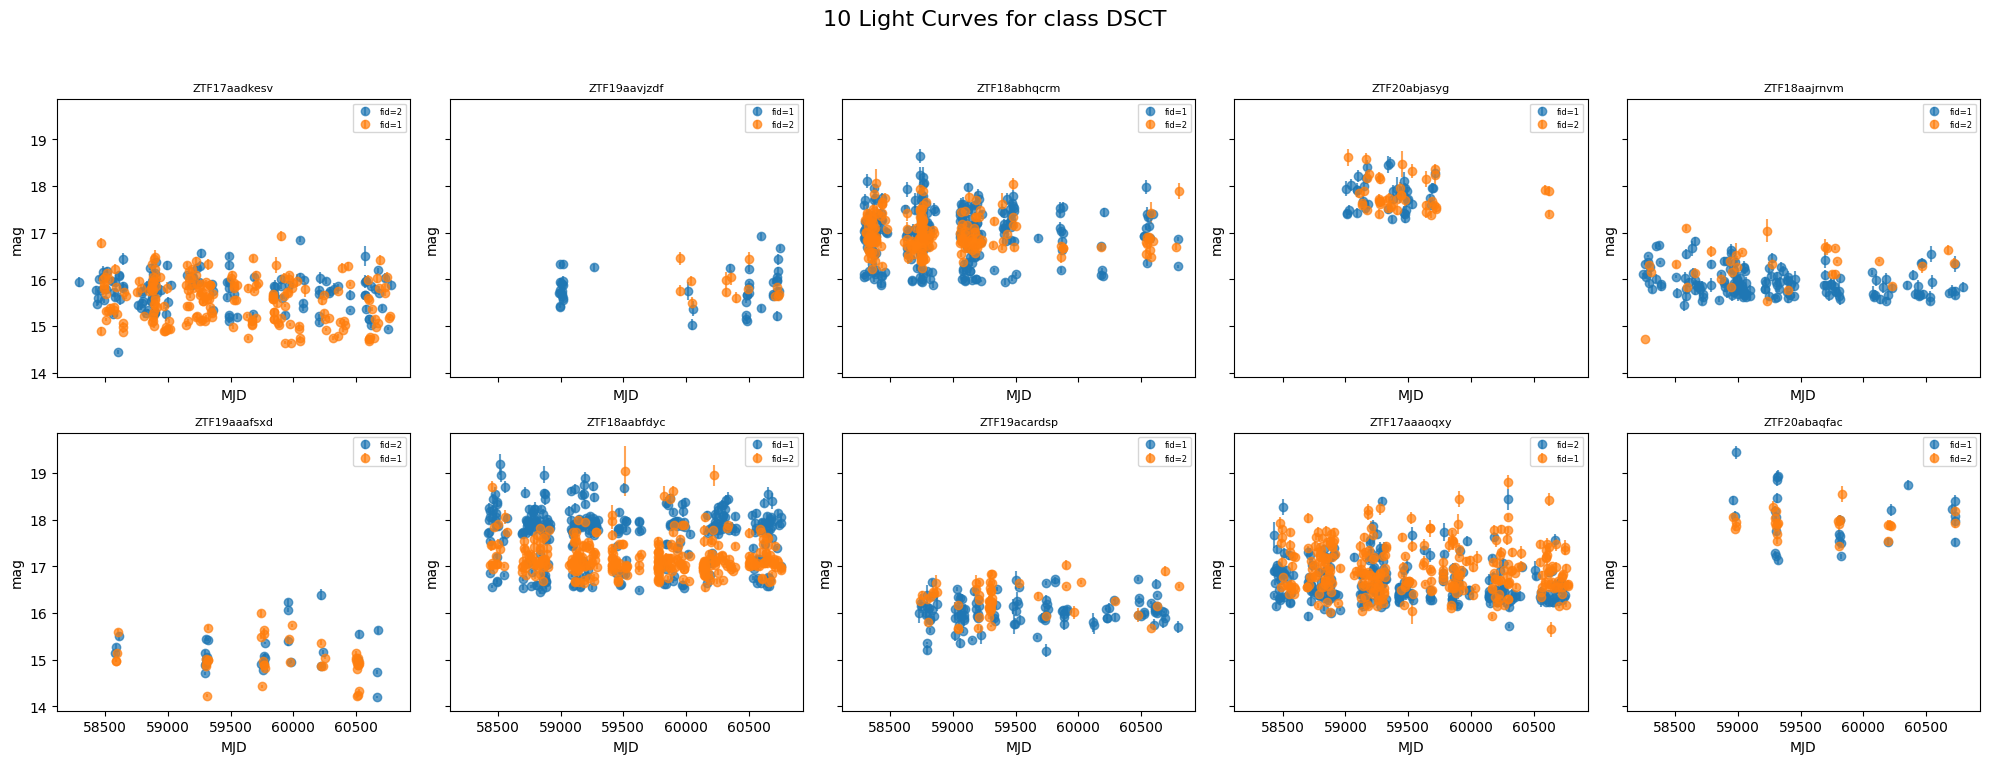

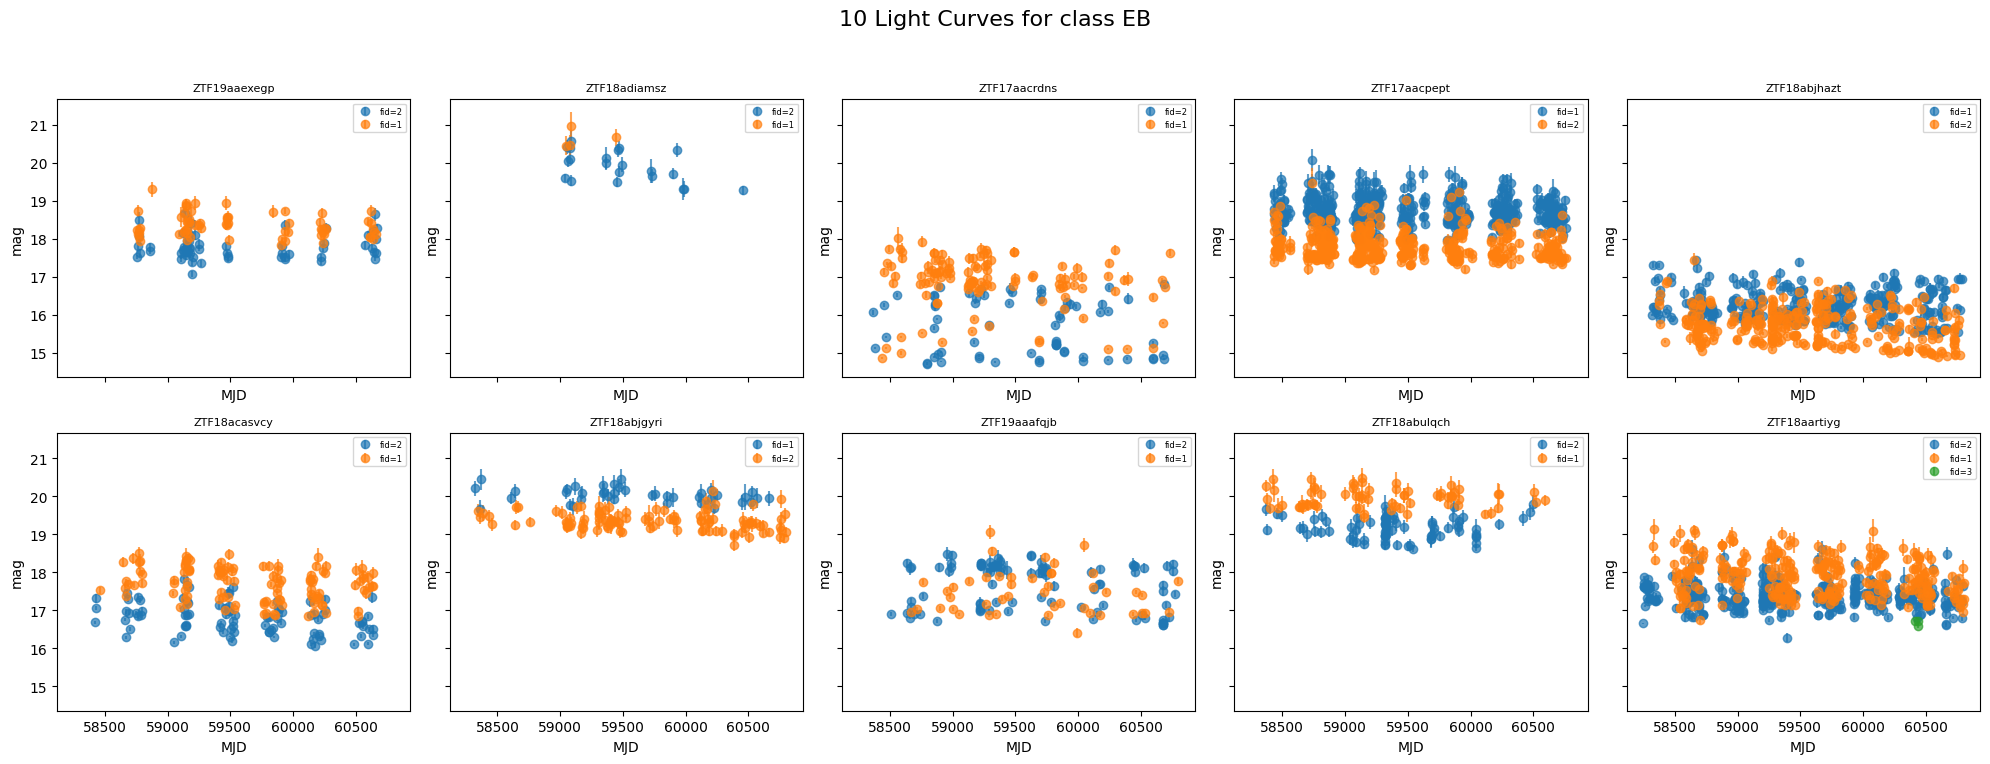

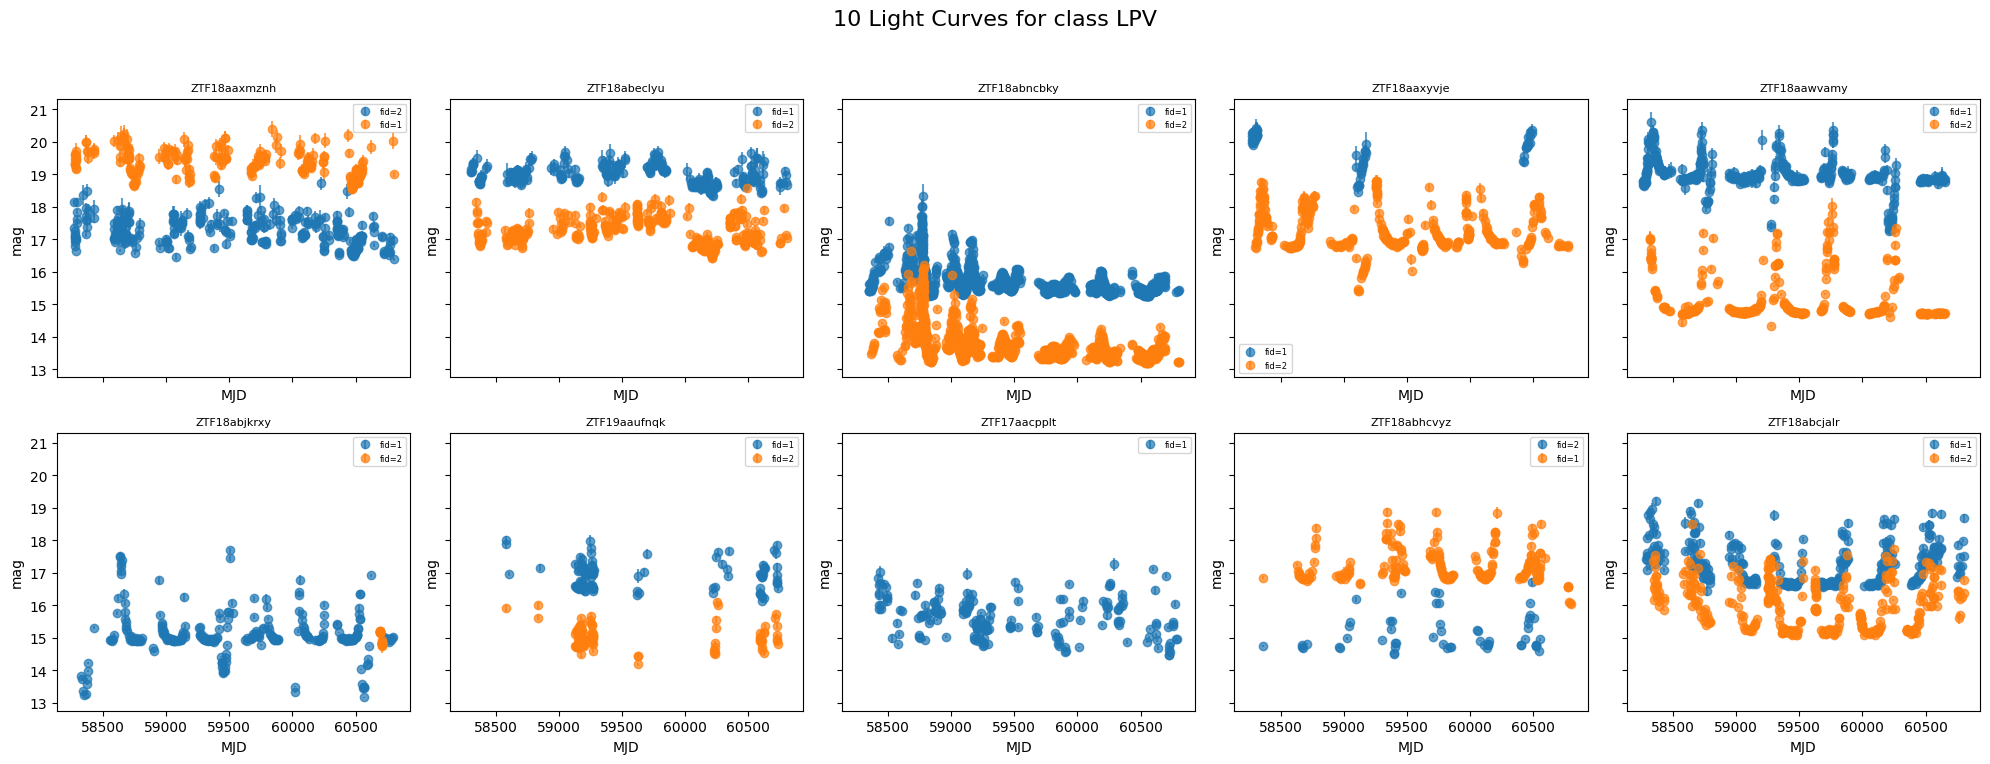

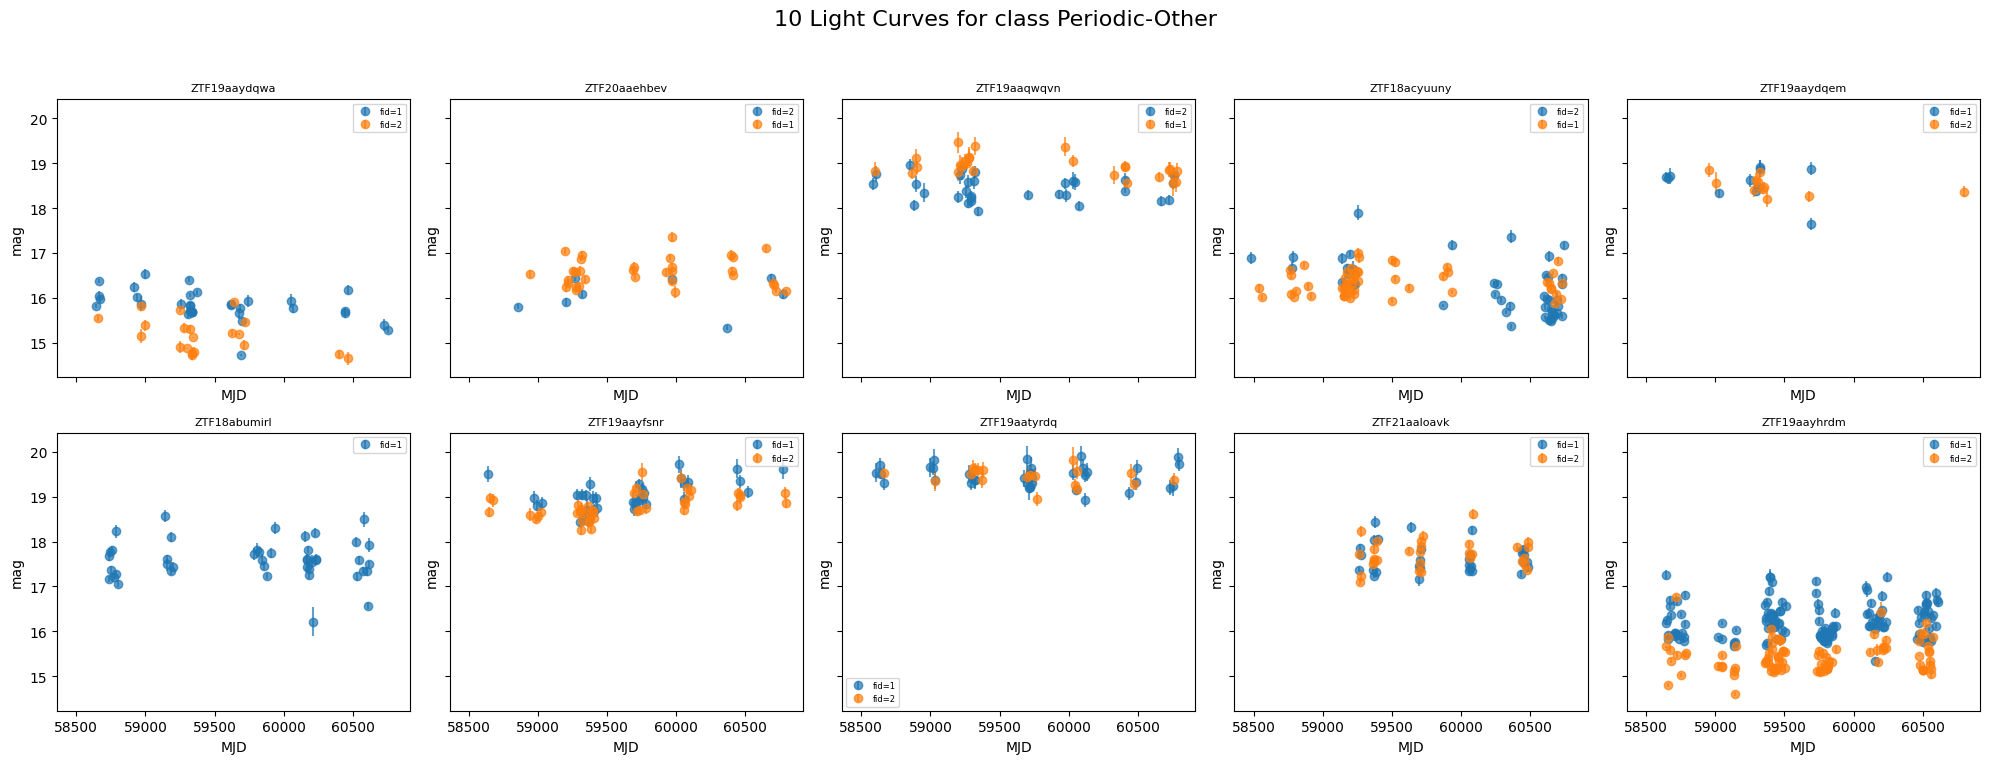

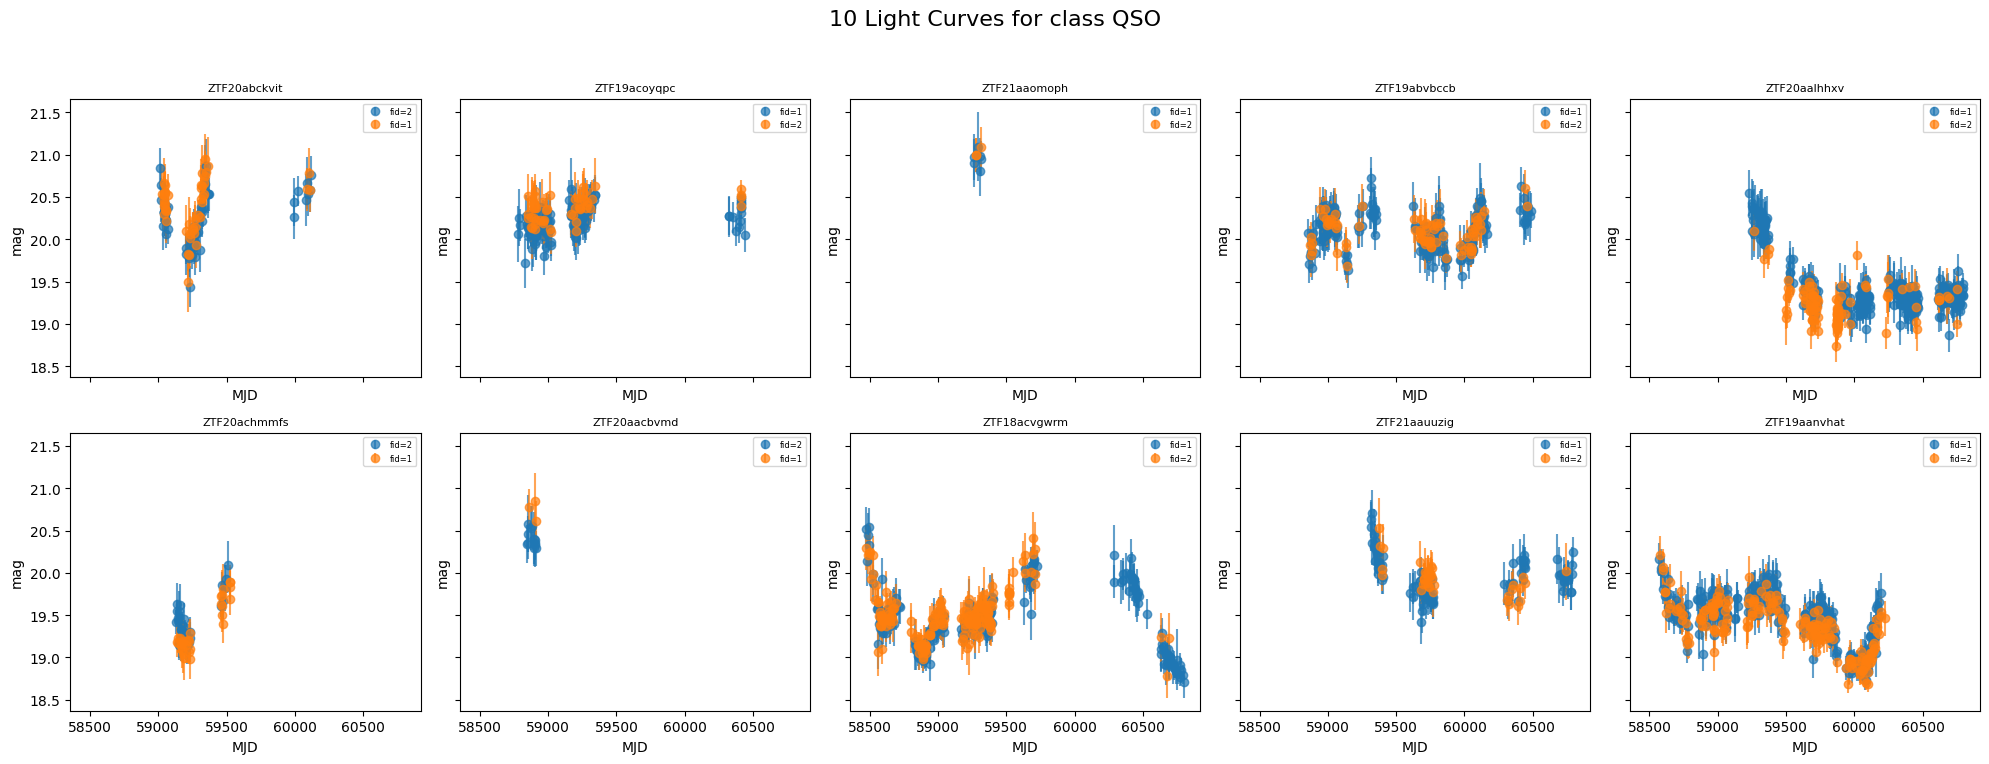

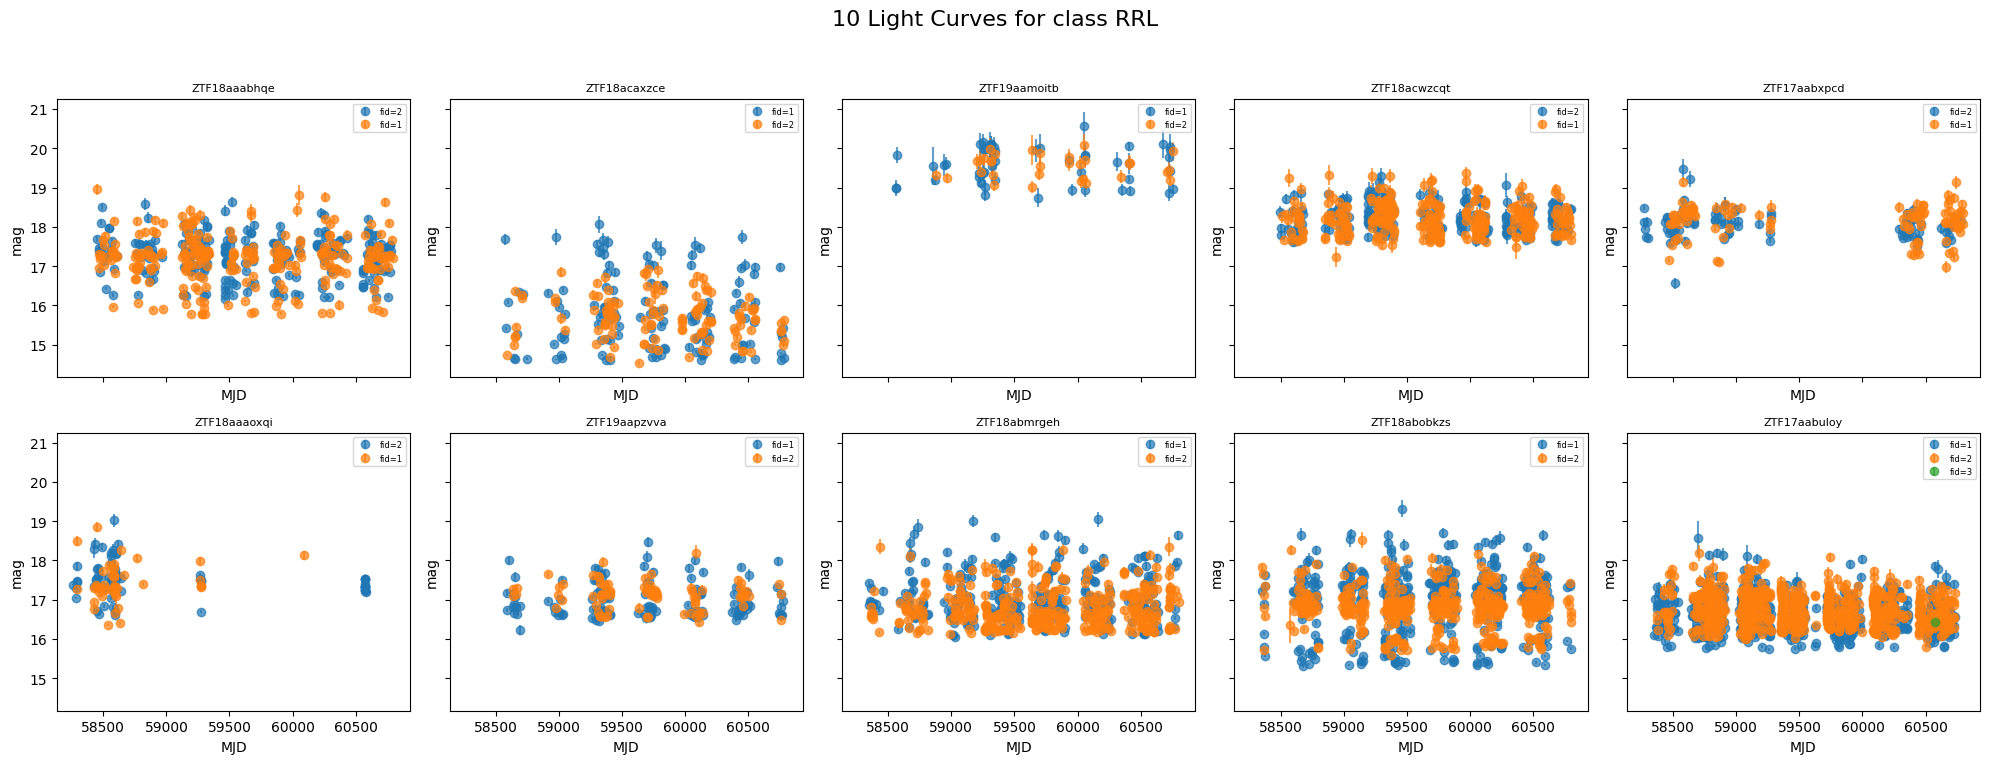

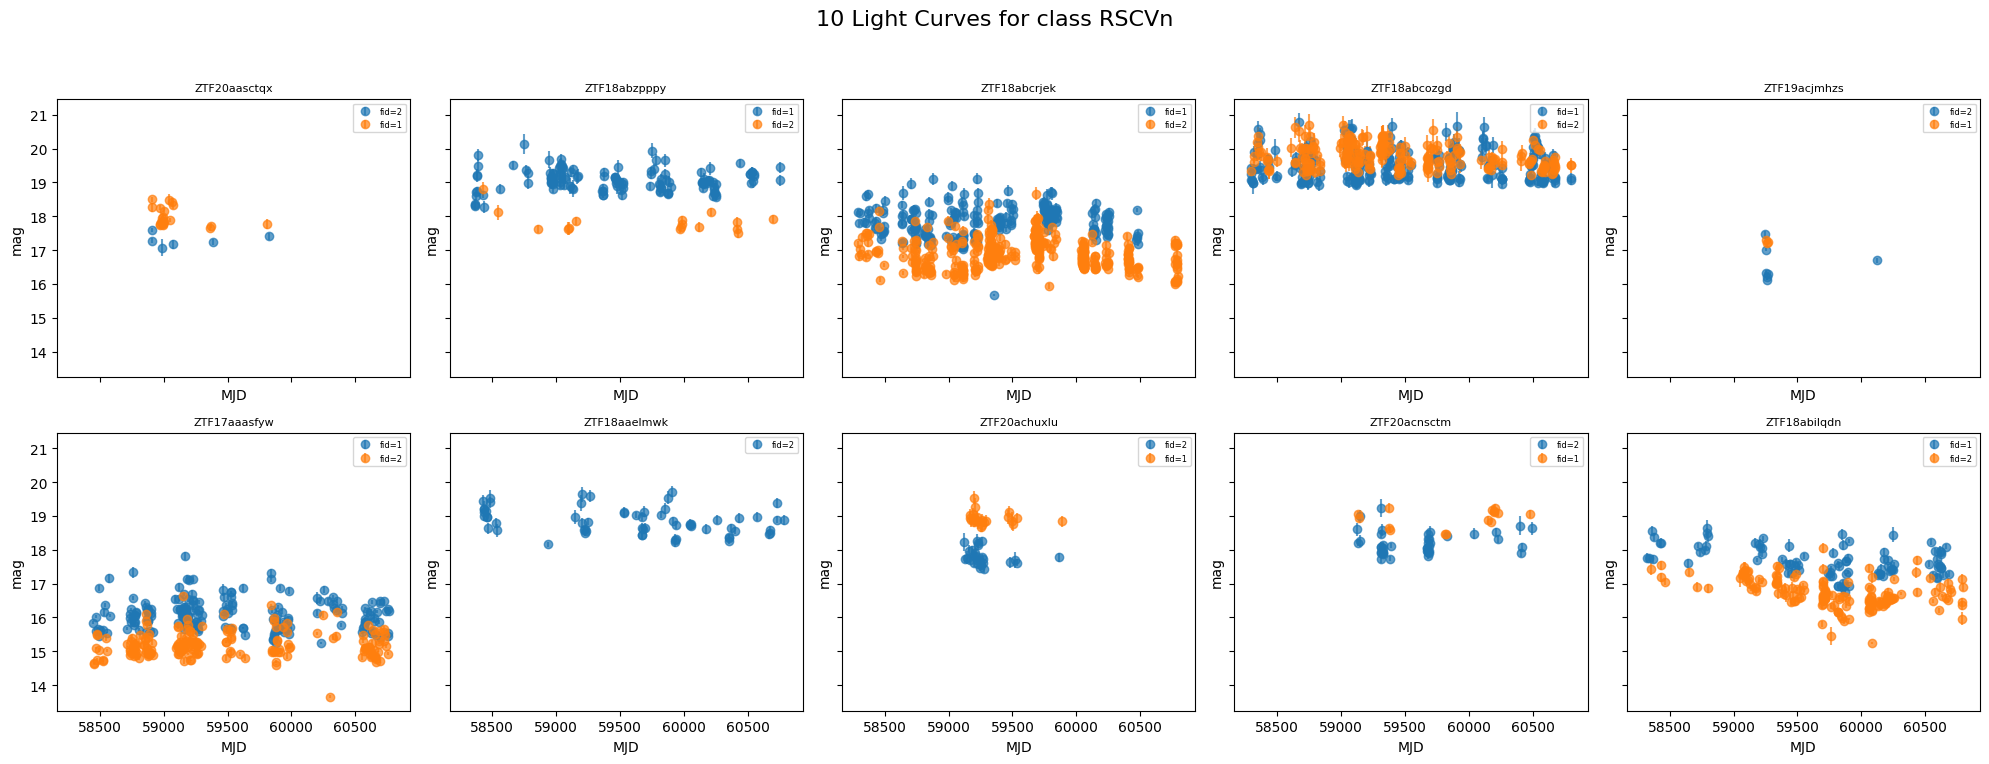

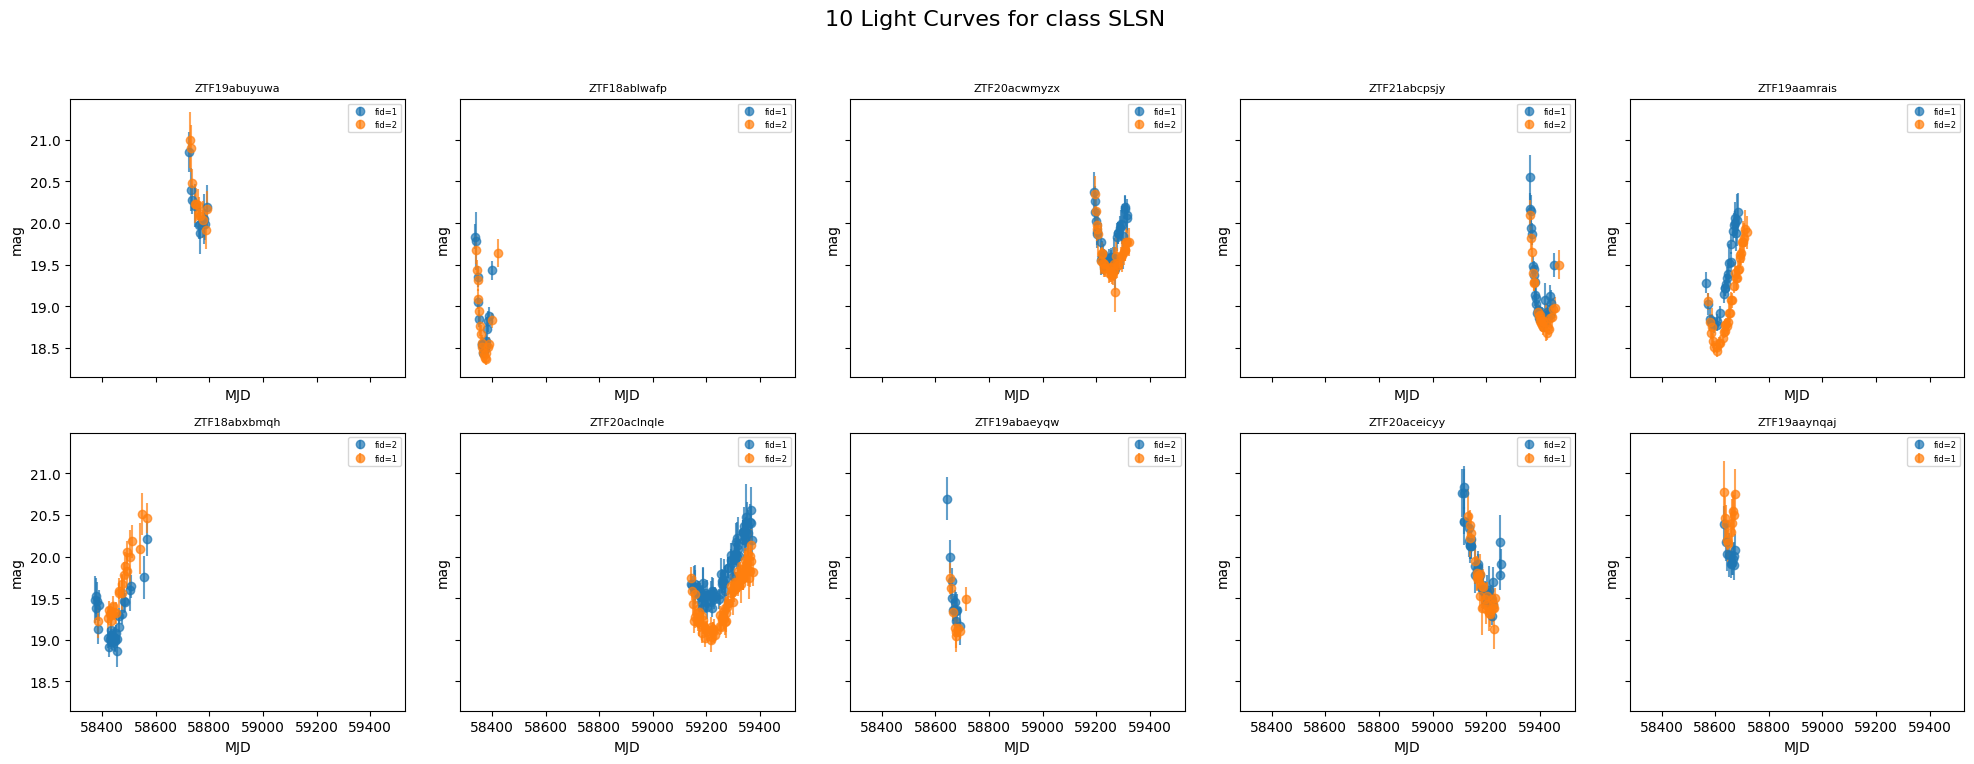

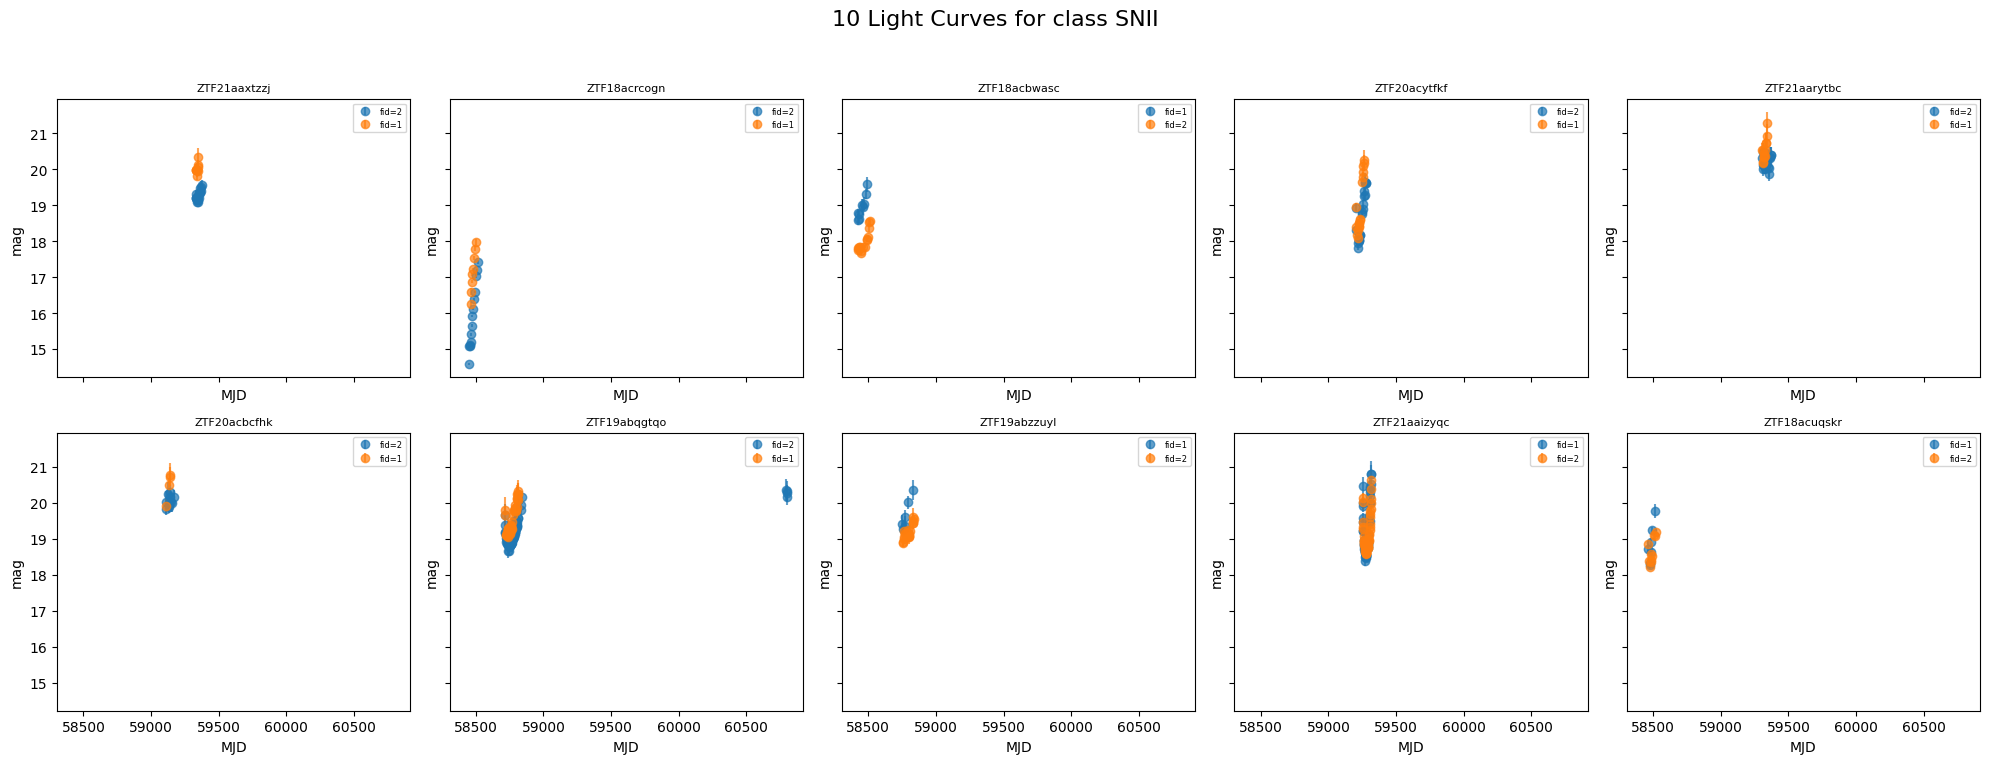

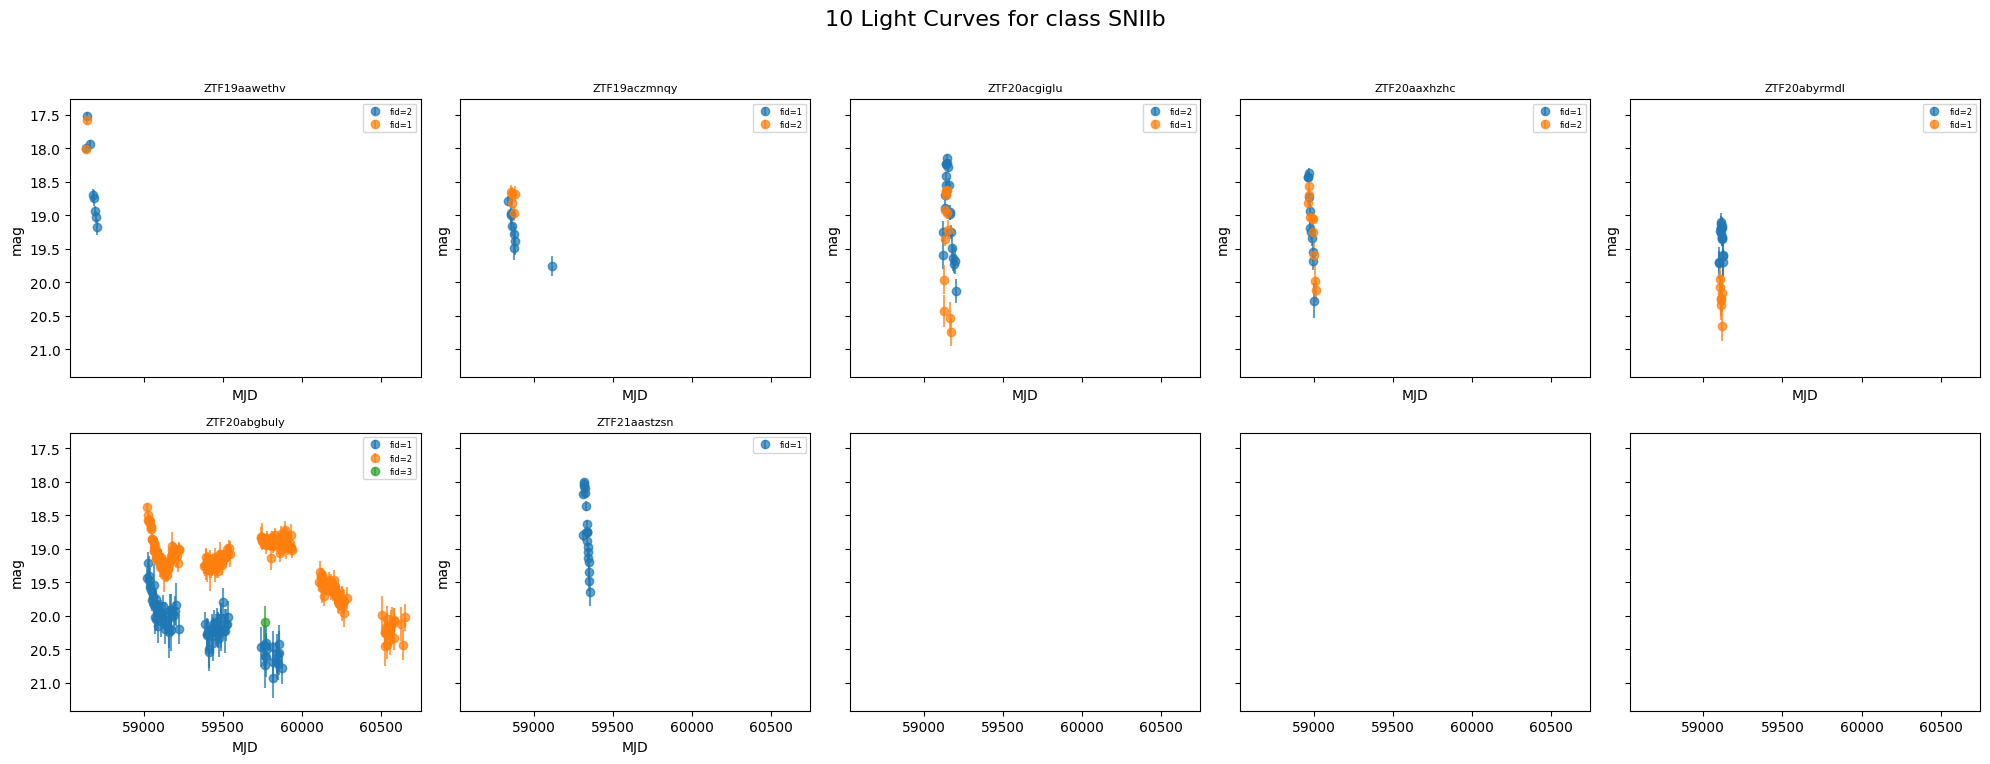

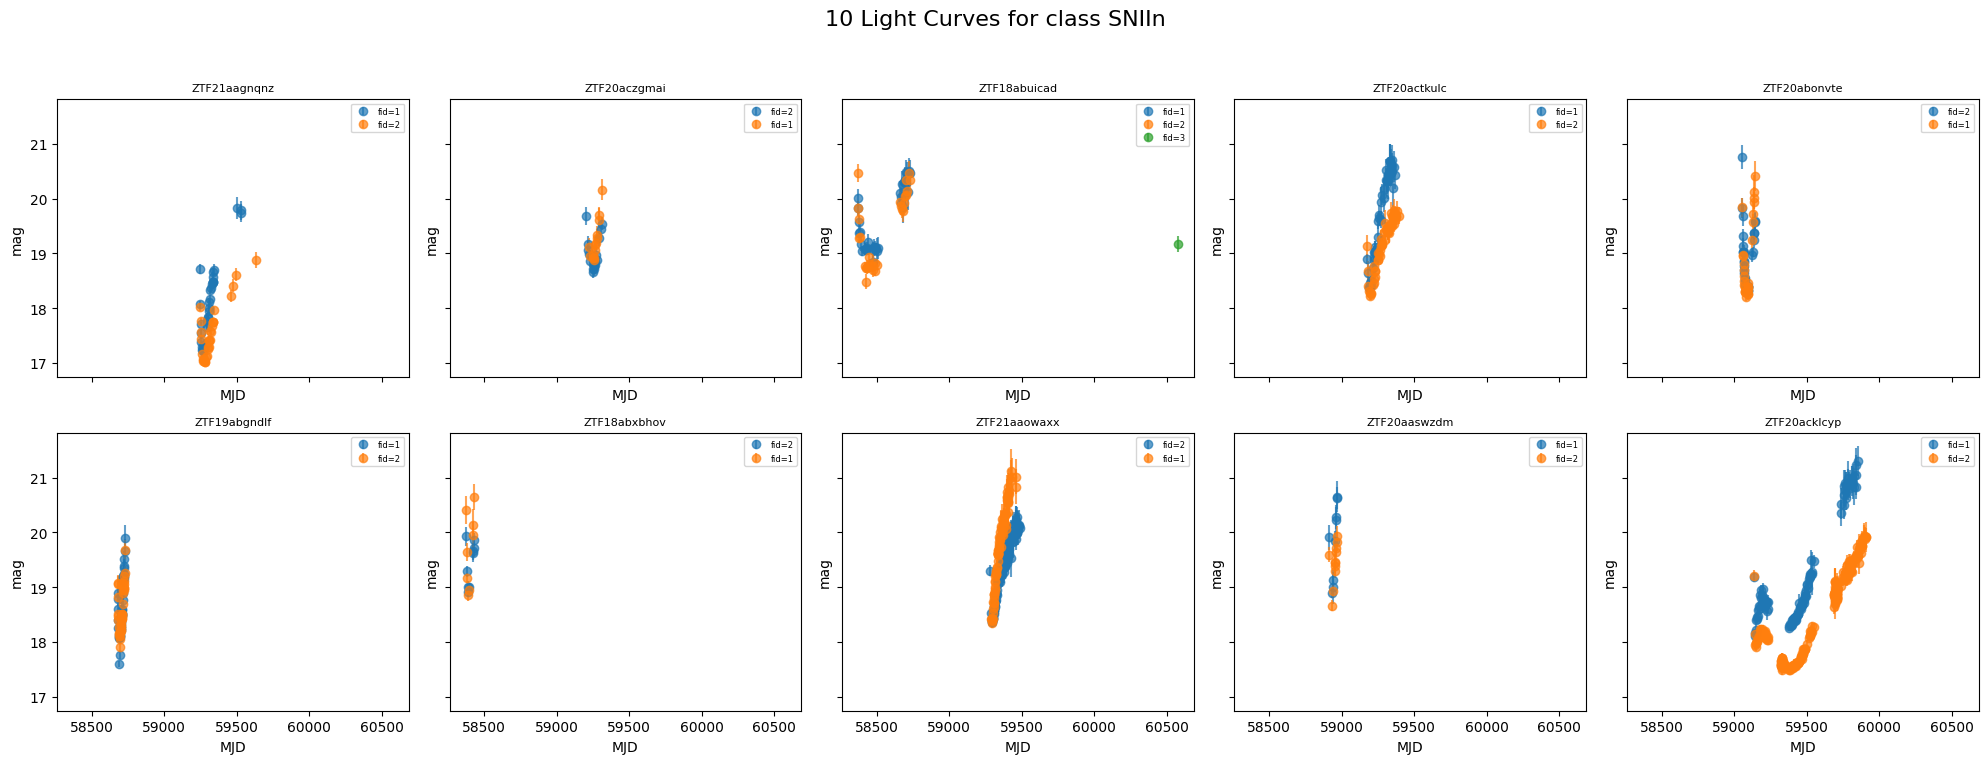

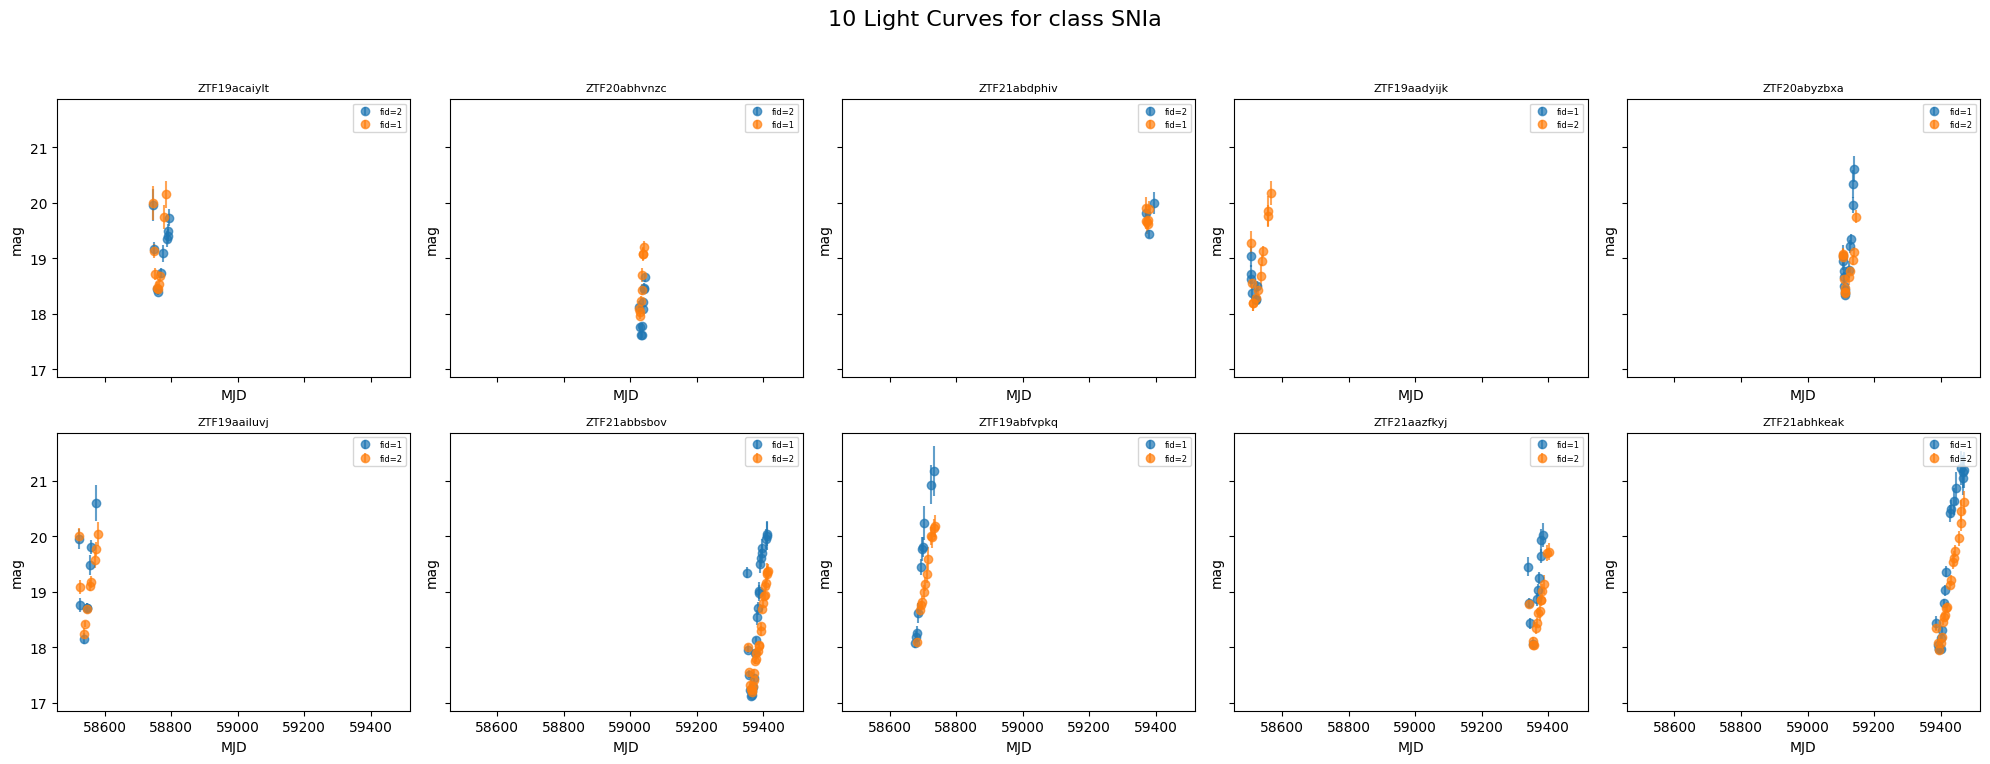

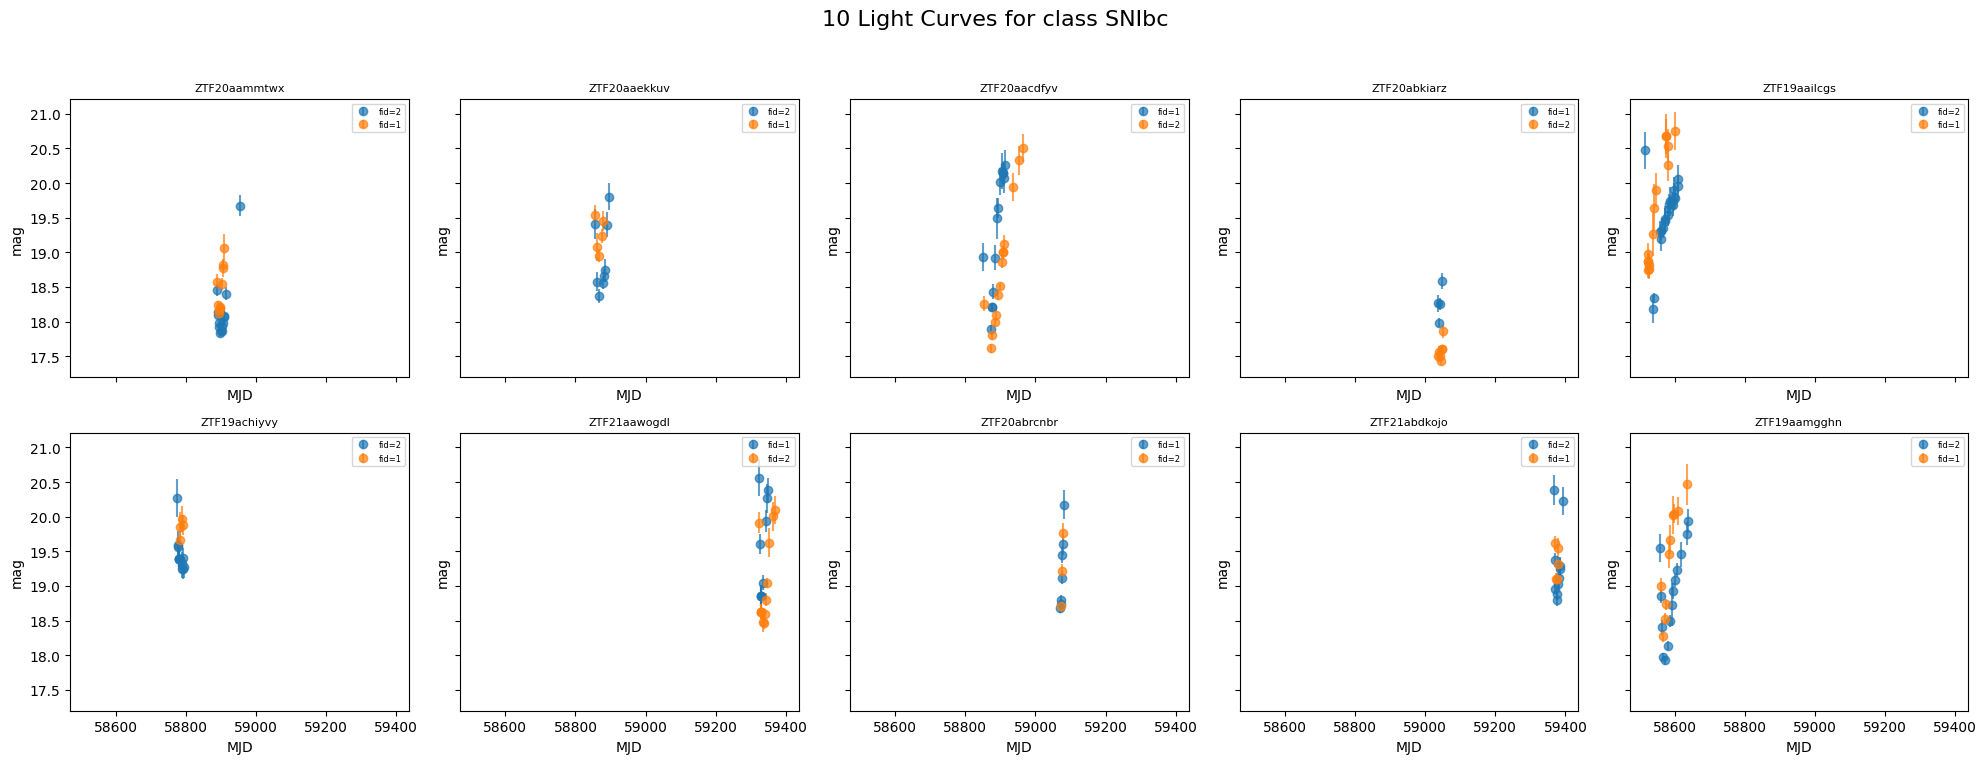

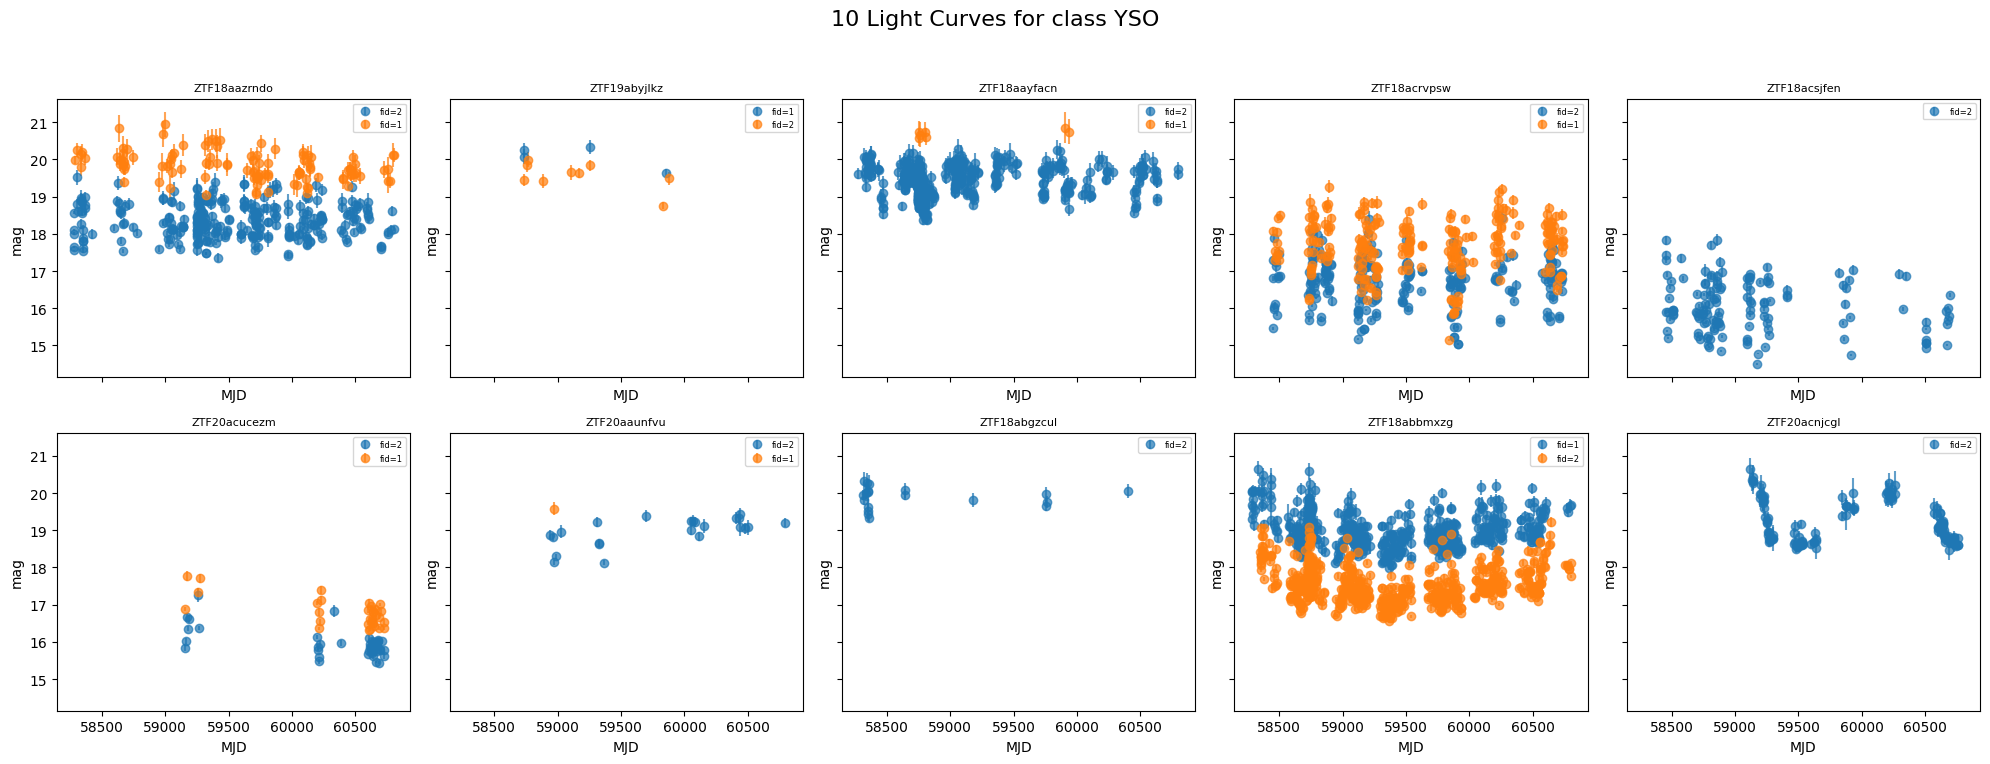

In [ ]:
from alerce.core import Alerce
alerce = Alerce()

for cls, group in sample.groupby('classALeRCE'):
    fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)
    axes = axes.ravel()
    fig.suptitle(f'10 Light Curves for class {cls}', fontsize=16)
    
    for ax, oid in zip(axes, group.index):
        # descarga la curva de luz: source_id es el OID
        lc_dict = alerce.query_lightcurve(oid, format='json')
        
        # Construye un DataFrame solo con las detecciones
        dets = pd.DataFrame(lc_dict.get('detections', []))

        if dets.empty:
            ax.set_title(f"{oid}\n(no detections)", fontsize=8)
            continue
        
        # graficar: el cliente devuelve un DataFrame con columnas 'mjd', 'magpsf', 'sigmapsf', 'fid'
        for fid in dets['fid'].unique():
            sub = dets[dets['fid'] == fid]
            ax.errorbar(
                sub['mjd'], sub['magpsf'], yerr=sub['sigmapsf'],
                fmt='o', alpha=0.7, label=f'fid={fid}'
            )
        ax.invert_yaxis()  # magnitudes: mas brillantes hacia arriba
        ax.set_title(oid, fontsize=8)
        ax.set_xlabel('MJD')
        ax.set_ylabel('mag')
        ax.legend(fontsize=6)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Ahora tomamos 30 muestras al azar de todo el dataframe. Luego lo graficamos de la misma manera que curvas de luz anteriores.

In [35]:
random_samples = df_final.sample(30)
random_samples

(Amplitude, 1)  (Amplitude, 2)  (AndersonDarling, 1)  \
oid                                                                  
ZTF18aabpzjt        0.410079        0.340178              1.000000   
ZTF17aaaikld        0.291835        0.285725              1.000000   
ZTF18abxfojy        0.118844        0.341036              0.997928   
ZTF19aabzufd        0.272052        0.250556              1.000000   
ZTF18aazewvy        0.797610        0.341036              0.999984   
ZTF19aakqwvd        0.041576        0.341036              0.626209   
ZTF19abddsck        0.086394        0.068473              0.986986   
ZTF19aaocgrw        0.238229        0.379593              0.953597   
ZTF18adawzwz        0.024291        0.024688              0.222453   
ZTF18aasnqap        0.469411        0.356247              1.000000   
ZTF18aajrtqe        1.106032        1.074871              1.000000   
ZTF18abcicrq        0.306213        0.341036              0.643868   
ZTF18acbujhd        1.162539        0.837444              1.000000   
ZTF17aacwarw        0.545774        0.364059              1.000000   
ZTF18acgrylv        0.644514        0.454397              1.000000   
ZTF18acvwlrn        0.044639        0.341036              0.176953   
ZTF18acyurwq        0.154894        0.067748              1.000000   
ZTF19aaxmgpx        0.061358        0.057588              0.472304   
ZTF18abzwqdk        0.698000        0.738880              0.982592   
ZTF19aatvsbt        0.281623        0.182528              0.394960   
ZTF18acmclkf        0.472150        0.340550              0.998968   
ZTF18acyuubx        0.394614        0.303123              1.000000   
ZTF18abkocvs        0.511376        0.152470              1.000000   
ZTF18aaxuivr        0.883375        1.029971              0.999998   
ZTF18abobuop        0.688421        0.542256              0.973906   
ZTF18abvkier        0.231048        0.215522              1.000000   
ZTF18abwwdba        1.118265        0.787398              1.000000   
ZTF18abcscaw        0.278190        0.267154              1.000000   
ZTF18acrugaj        0.570985        0.392006              1.000000   
ZTF20aadcdrg        0.280010        0.341036              0.996300   

              (AndersonDarling, 2)  (Autocor_length, 1)  (Autocor_length, 2)  \
oid                                                                            
ZTF18aabpzjt              1.000000                  1.0                  1.0   
ZTF17aaaikld              1.000000                  1.0                  1.0   
ZTF18abxfojy              0.999747                  1.0                  1.0   
ZTF19aabzufd              1.000000                  1.0                  1.0   
ZTF18aazewvy              0.999747                  1.0                  1.0   
ZTF19aakqwvd              0.999747                  1.0                  1.0   
ZTF19abddsck              0.999741                  1.0                  1.0   
ZTF19aaocgrw              0.999854                  2.0                  1.0   
ZTF18adawzwz              0.890305                  1.0                  1.0   
ZTF18aasnqap              1.000000                  8.0                  6.0   
ZTF18aajrtqe              1.000000                  1.0                  1.0   
ZTF18abcicrq              0.999747                  1.0                  1.0   
ZTF18acbujhd              1.000000                  1.0                  1.0   
ZTF17aacwarw              1.000000                  1.0                  1.0   
ZTF18acgrylv              1.000000                  1.0                  1.0   
ZTF18acvwlrn              0.999747                  1.0                  1.0   
ZTF18acyurwq              0.314058                  1.0                  1.0   
ZTF19aaxmgpx              0.195829                  1.0                  1.0   
ZTF18abzwqdk              0.989176                  1.0                  1.0   
ZTF19aatvsbt              0.997922                  1.0                  1.0   
ZTF18acmclkf 

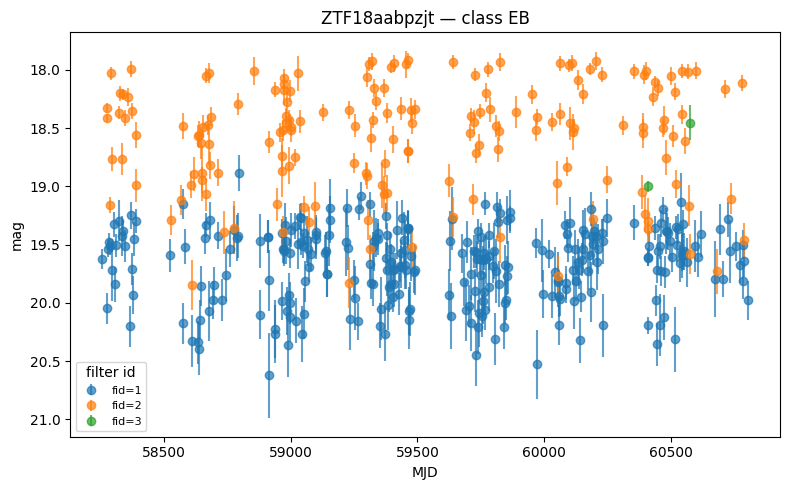

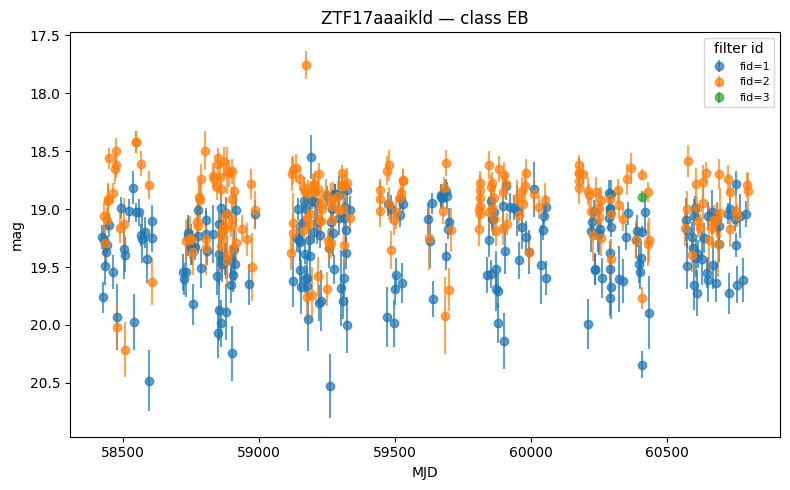

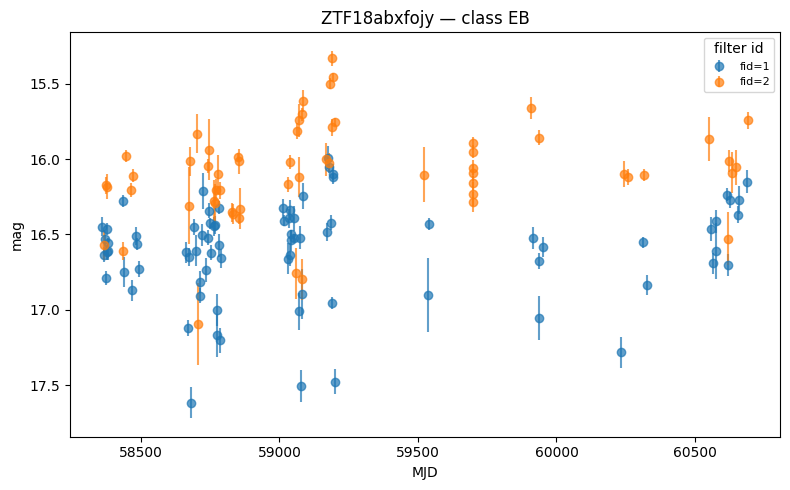

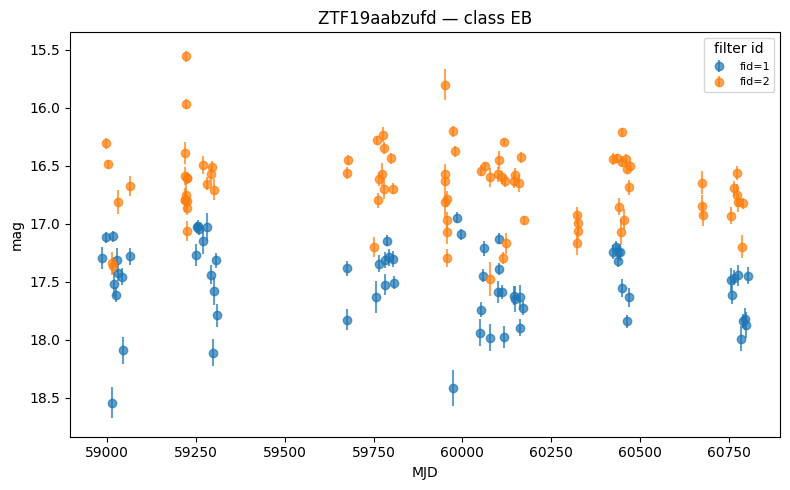

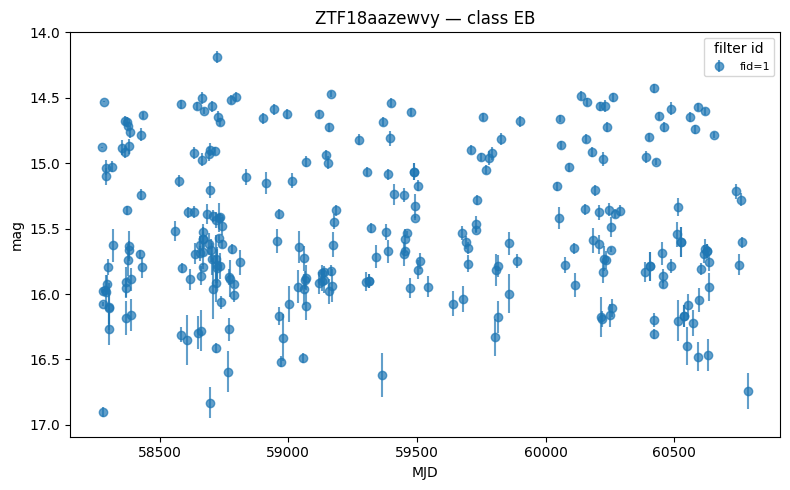

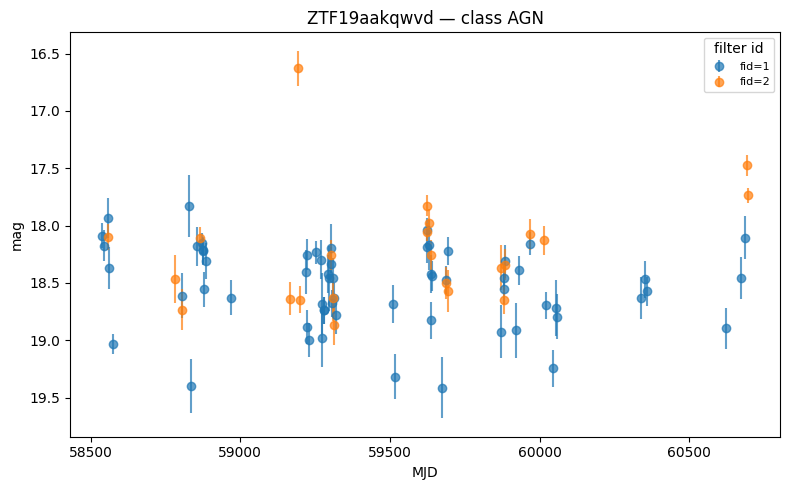

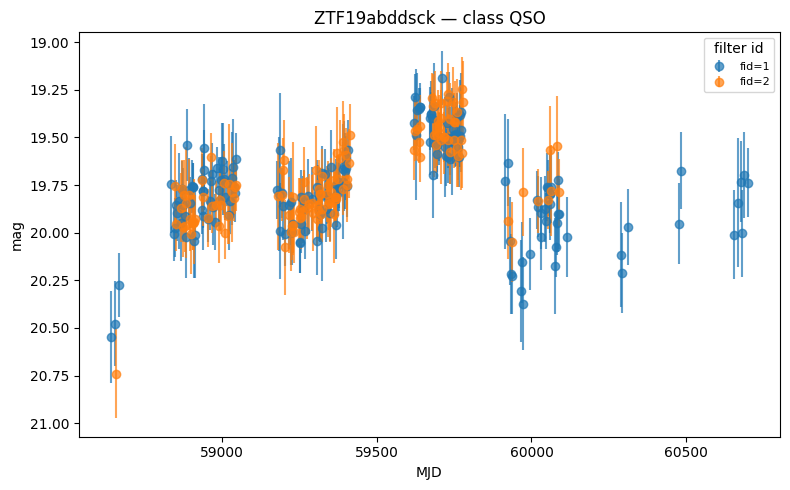

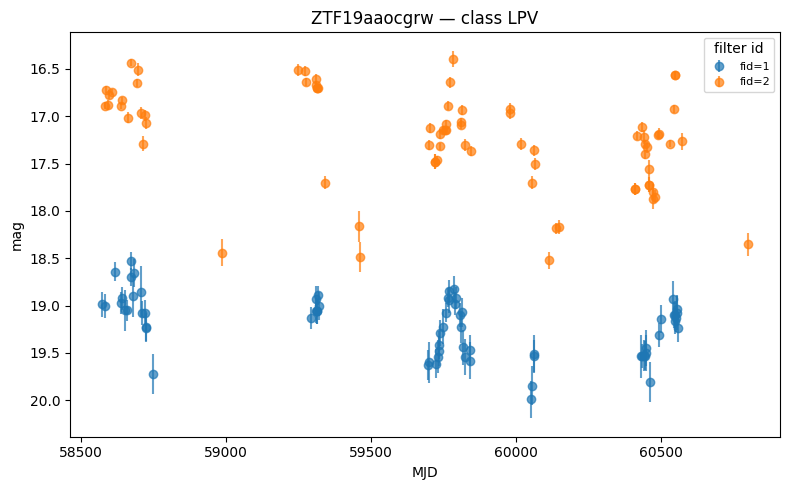

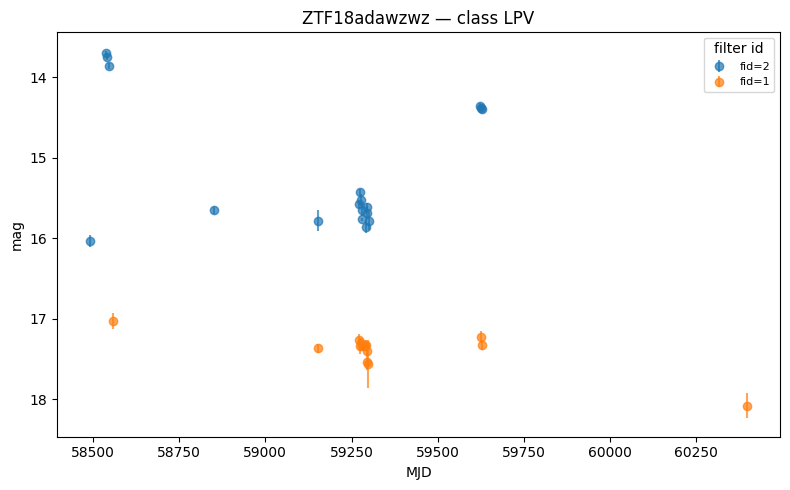

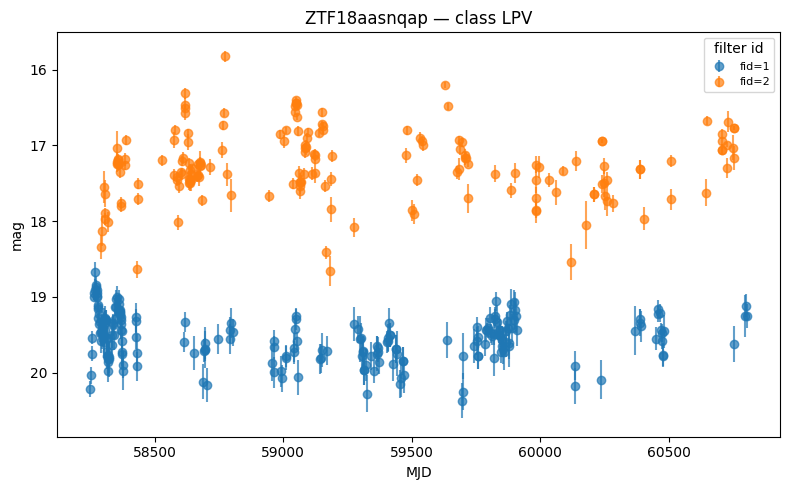

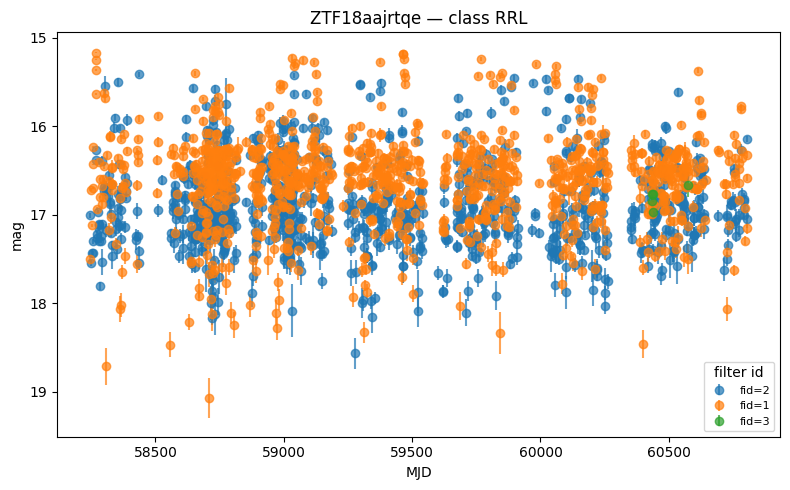

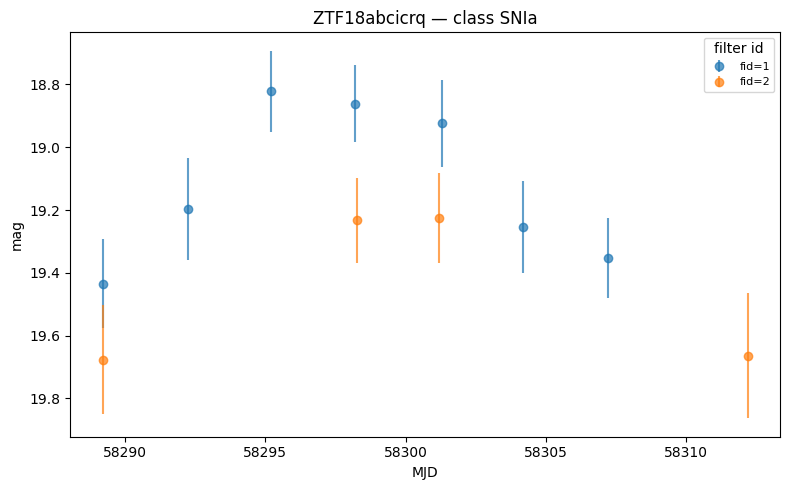

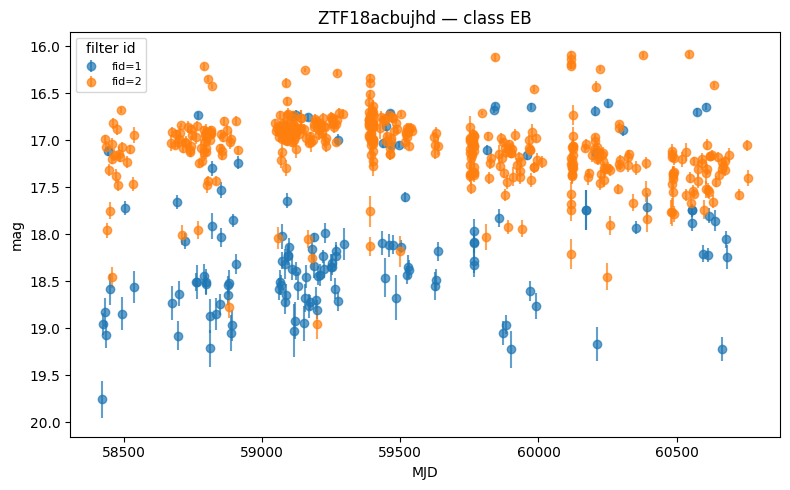

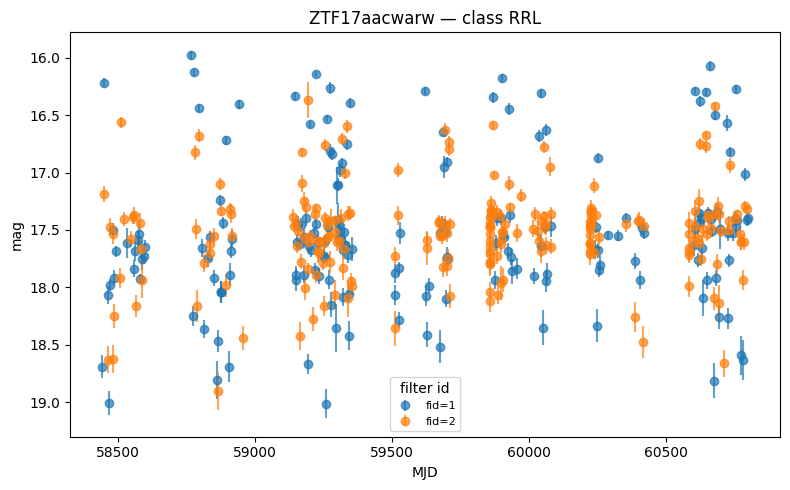

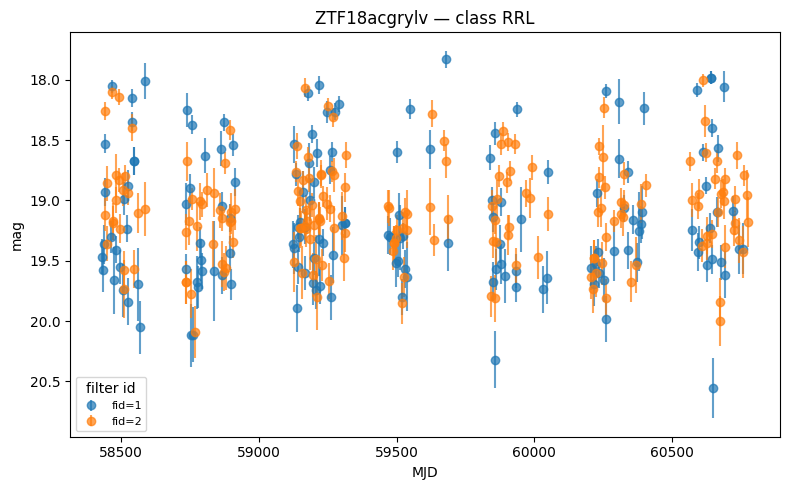

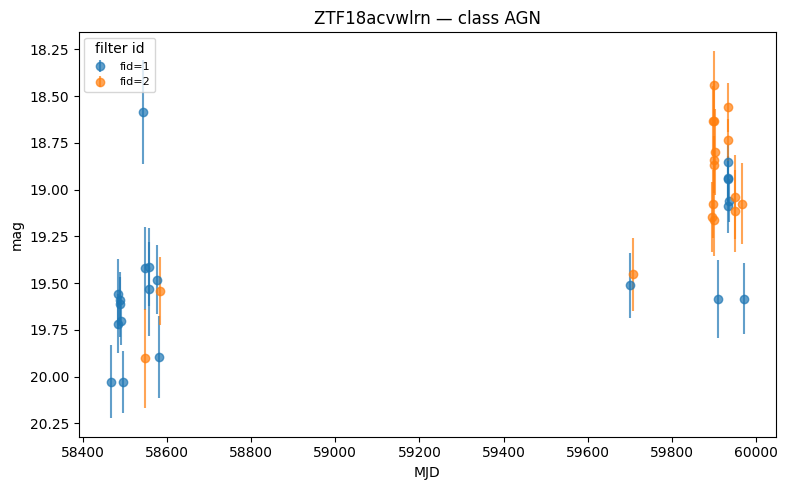

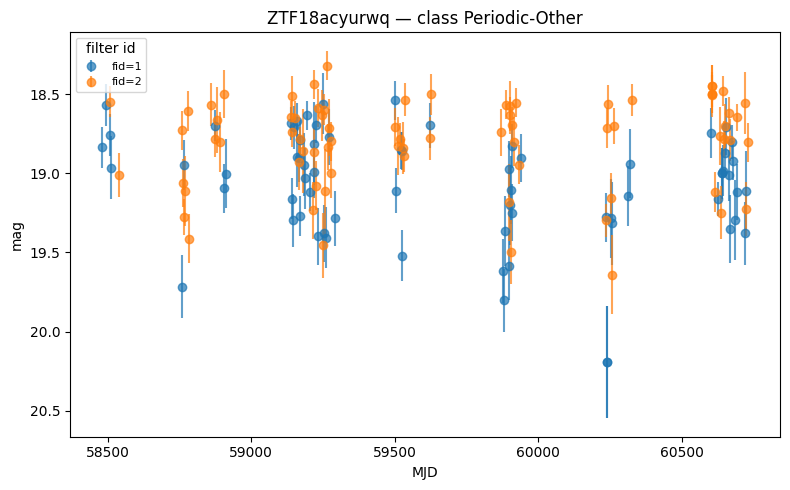

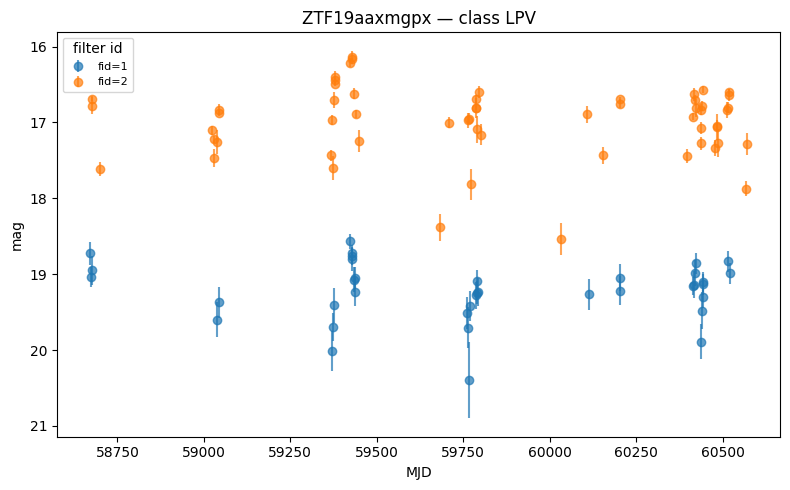

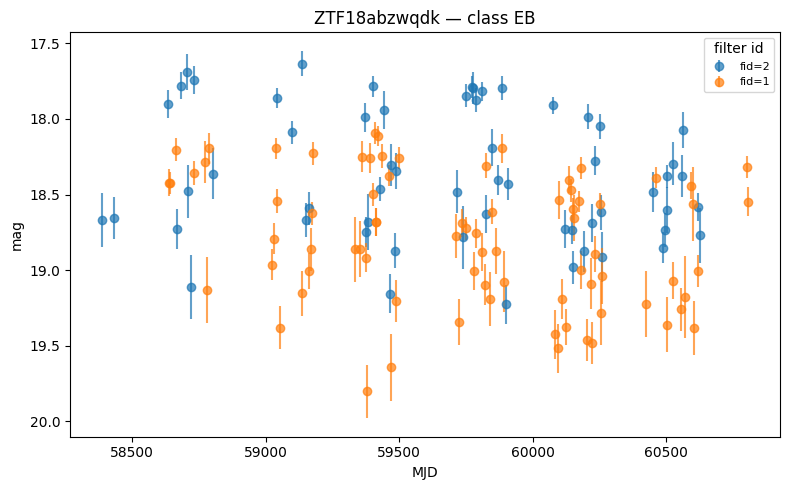

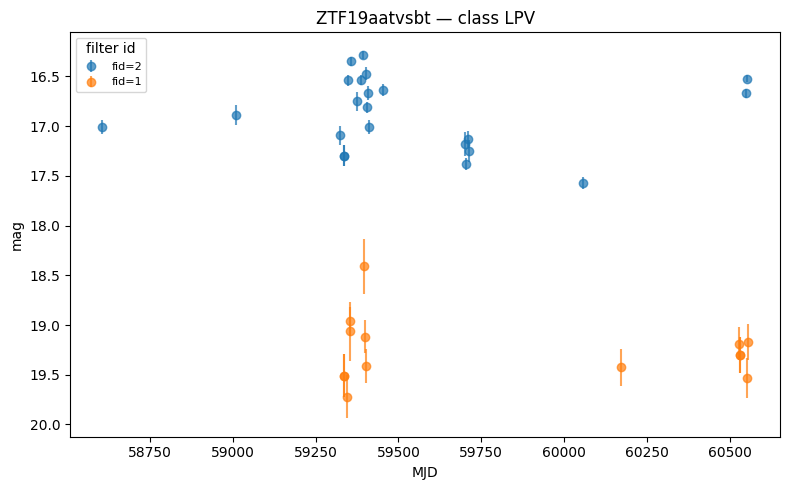

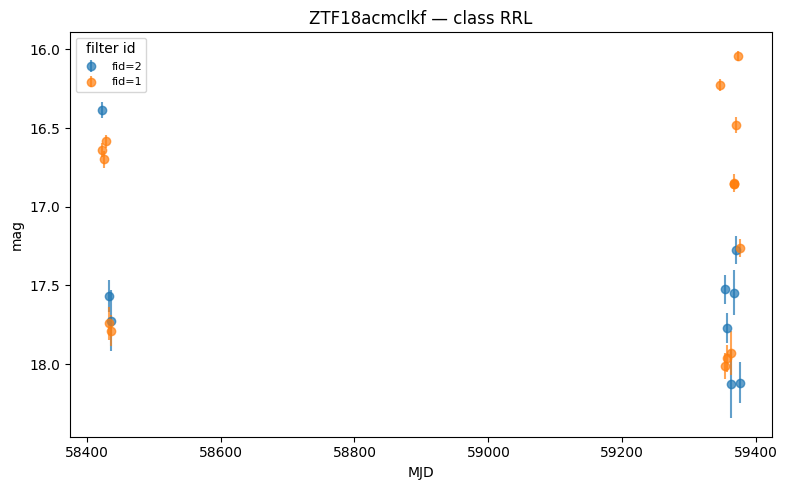

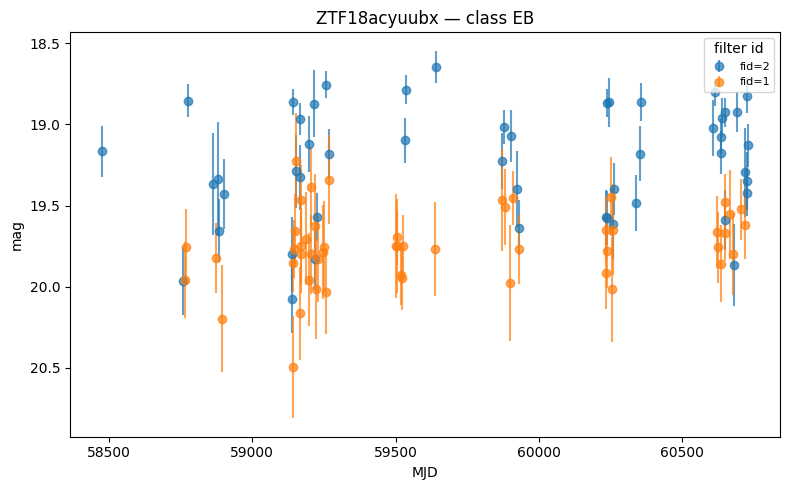

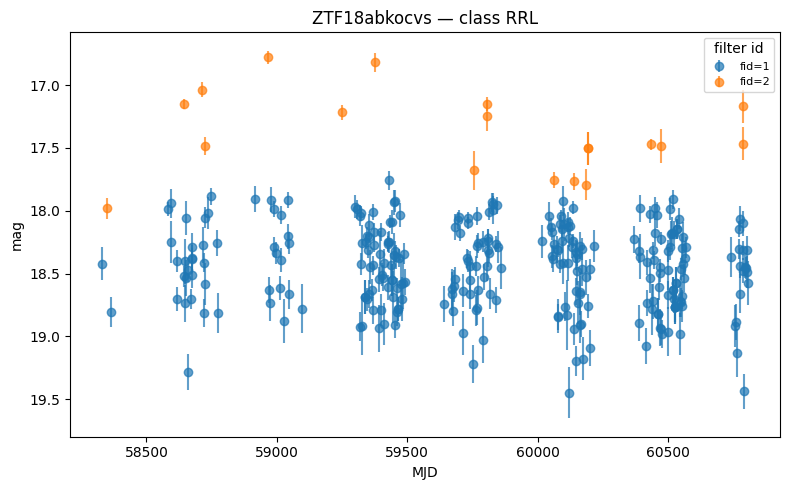

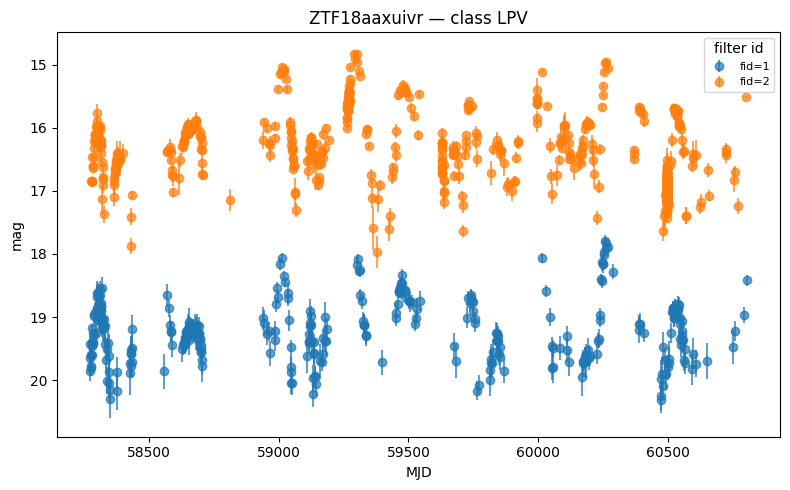

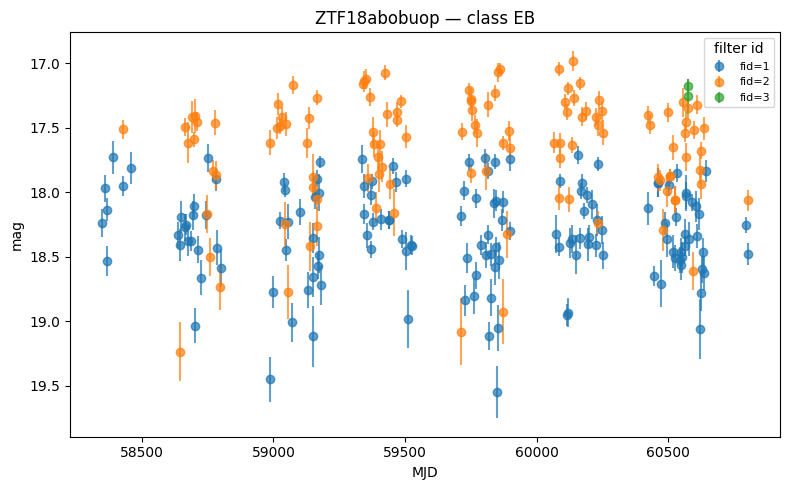

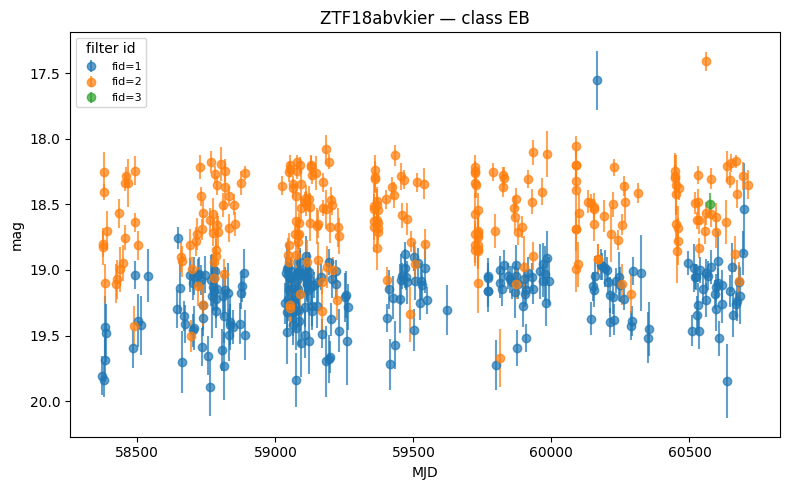

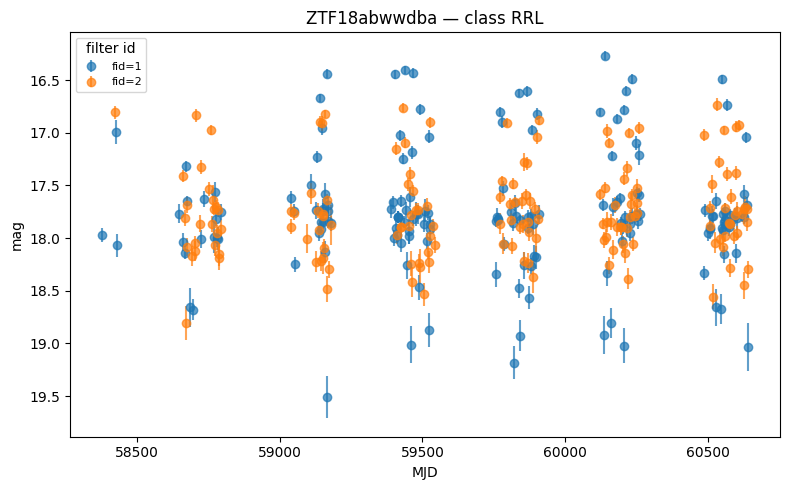

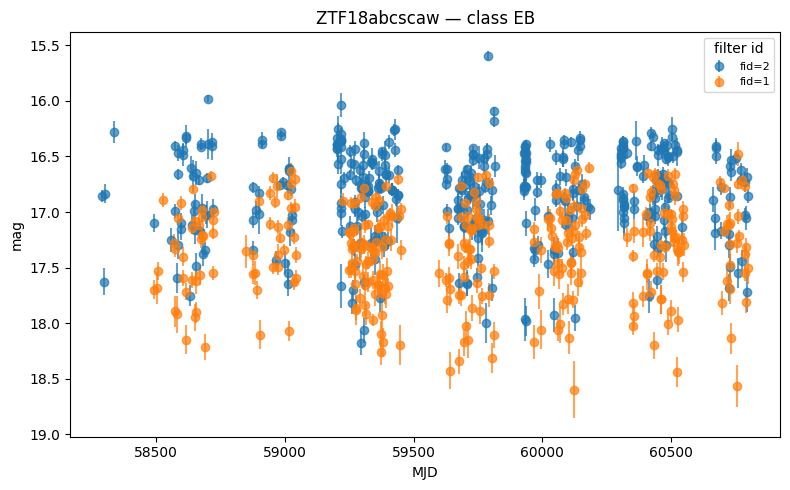

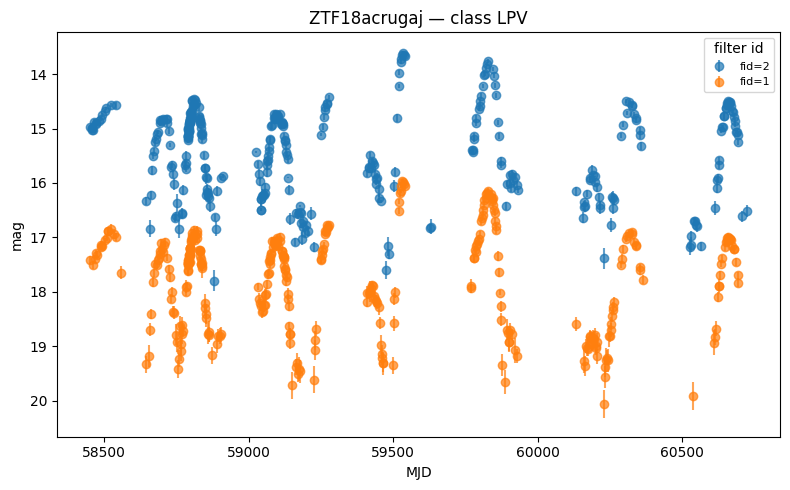

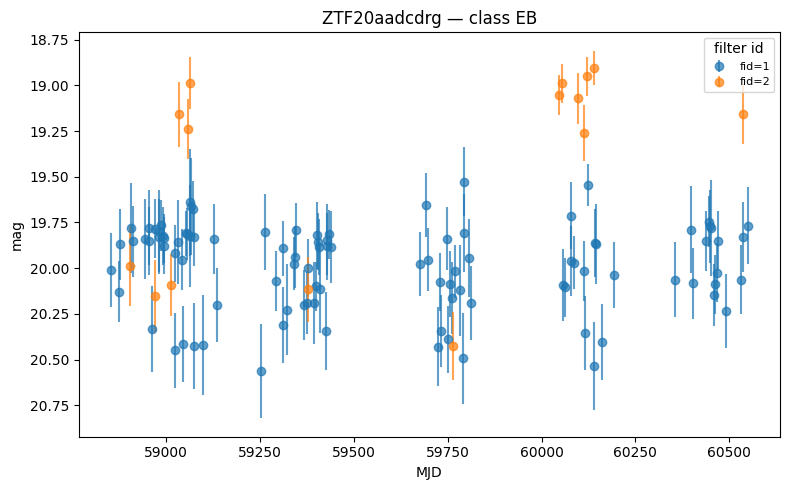

In [46]:
for source in random_samples.itertuples():
    oid = source.Index
    cls = source.classALeRCE
    
    # 1) Descarga y prepara detecciones
    lc_dict = alerce.query_lightcurve(oid, format='json')
    dets = pd.DataFrame(lc_dict.get('detections', []))
    
    # 2) Crea figura individual
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.set_title(f"{oid} — class {cls}", fontsize=12)
    ax.set_xlabel('MJD')
    ax.set_ylabel('mag')
    
    if dets.empty:
        ax.text(0.5, 0.5, 'No detections', ha='center', va='center')
    else:
        # 3) Grafica por filtro
        for fid in dets['fid'].unique():
            sub = dets[dets['fid'] == fid]
            ax.errorbar(
                sub['mjd'], sub['magpsf'], yerr=sub['sigmapsf'],
                fmt='o', alpha=0.7, label=f'fid={fid}'
            )
        ax.invert_yaxis()
        ax.legend(title='filter id', fontsize=8)
    
    plt.tight_layout()
    plt.show()

Se pueden apreciar algunas similitudes entre estas muestras y las de las clases. Por ejemplo, las EB los canales suelen ser "mas gruesos" y suelen estar "mas juntos". Otro ejemplo es el LPV que se ve como una "lluvia". Sin embargo, no todas las fuentes de estas clases tienen estas caracteristicas marcadas, por lo que es complicado poder visualmente clasificarlas. En este caso yo (un humano) he obtenido un pobre f1 score (consideremos las 10 muestras de cada clase como el entrenamiento y la clasificacion de las ultimas 30 como el test).

## Pregunta 3

### Parte a

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.3,
    random_state=412,
    stratify=y
)

print("Train / Test sizes:", X_train.shape[0], X_test.shape[0])

Train / Test sizes: 27286 11695


### Parte b

Definimos 3 Modelos. Utilizaremos: Logistic Regression, RandomForest y Support Vector Classifier.

In [55]:
# Definimos los modelos, utilizaremos arreglos para los hiperparámetros
# ya que el GridSearchCV los espera en forma de lista
models = {
    'LogisticRegression': {
        'clf': LogisticRegression(max_iter=1000),
        'params': {
            'clf__C':        [0.01, 0.1, 1, 10],
            'clf__penalty':  ['l2'],
            'clf__solver':   ['lbfgs']
        }
    },
    'RandomForest': {
        'clf': RandomForestClassifier(random_state=666),
        'params': {
            'clf__n_estimators':    [50, 100, 200],
            'clf__max_depth':       [None, 5, 10],
            'clf__min_samples_split':[2, 5]
        }
    },
    'SVC': {
        'clf': SVC(probability=True),
        'params': {
            'clf__C': [0.1, 1, 10],
            'clf__kernel': ['linear', 'rbf'],
            'clf__gamma': ['scale', 'auto']
        }
    }
}

# Configuramos el KFold para la validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=412)

# Buscamos los mejores hiperparámetros para cada modelo
best_estimators = {}
for name, mp in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', mp['clf'])
    ])
    grid = GridSearchCV(
        pipe,
        param_grid=mp['params'],
        scoring='accuracy',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Best score for {name}: {grid.best_score_}")
    best_estimators[name] = grid.best_estimator_

for name, estimator in best_estimators.items():
    y_pred = estimator.predict(X_test)
    accuarcy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuarcy:.4f}")
    print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params for LogisticRegression: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best score for LogisticRegression: 0.8829435542328902
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params for RandomForest: {'clf__max_depth': None, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
Best score for RandomForest: 0.9009382995192166
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params for SVC: {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Best score for SVC: 0.8981528728586122
Accuracy for LogisticRegression: 0.8882


C:\Users\benja\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\benja\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\benja\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

                precision    recall  f1-score   support

           AGN       0.74      0.67      0.71       371
        Blazar       0.48      0.22      0.30        90
       CV/Nova       0.70      0.56      0.62        59
          Ceph       0.67      0.20      0.31        40
          DSCT       0.33      0.08      0.13        63
            EB       0.85      0.92      0.89      3106
           LPV       0.97      0.98      0.97      2599
Periodic-Other       0.00      0.00      0.00        50
           QSO       0.93      0.96      0.94      2505
           RRL       0.88      0.87      0.87      2278
         RSCVn       0.12      0.02      0.04        88
          SLSN       0.33      0.33      0.33         3
          SNII       0.41      0.38      0.39        32
         SNIIb       0.00      0.00      0.00         2
         SNIIn       0.00      0.00      0.00         4
          SNIa       0.78      0.85      0.81       151
         SNIbc       0.10      0.08      0.09  

C:\Users\benja\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\benja\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\benja\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Accuracy for SVC: 0.9012
                precision    recall  f1-score   support

           AGN       0.71      0.64      0.68       371
        Blazar       0.41      0.16      0.23        90
       CV/Nova       0.79      0.44      0.57        59
          Ceph       0.75      0.23      0.35        40
          DSCT       0.44      0.06      0.11        63
            EB       0.88      0.94      0.91      3106
           LPV       0.96      0.99      0.97      2599
Periodic-Other       0.00      0.00      0.00        50
           QSO       0.93      0.96      0.94      2505
           RRL       0.90      0.90      0.90      2278
         RSCVn       0.14      0.02      0.04        88
          SLSN       0.00      0.00      0.00         3
          SNII       0.57      0.38      0.45        32
         SNIIb       0.00      0.00      0.00         2
         SNIIn       0.00      0.00      0.00         4
          SNIa       0.82      0.89      0.85       151
         SNIbc       0

C:\Users\benja\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\benja\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\benja\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [ ]:
# El gridSearch se demoro 140 minutos, por lo que guardamos los modelos
# en disco por si se pierden. NOTA: esto no es necesario para la tarea.
import joblib

joblib.dump(best_estimators, 'best_estimators.pkl')

for name, estimator in best_estimators.items():
    filename = f'{name.lower()}_best_model.pkl'
    joblib.dump(estimator, filename)
    print(f'Modelo {name} guardado en {filename}')

Modelo LogisticRegression guardado en logisticregression_best_model.pkl
Modelo RandomForest guardado en randomforest_best_model.pkl
Modelo SVC guardado en svc_best_model.pkl


Guardamos en este markdown las metricas para los distintos modelos

### Logistic Regresion

Accuracy for LogisticRegression: 0.8882

                precision    recall  f1-score   support

           AGN       0.74      0.67      0.71       371
        Blazar       0.48      0.22      0.30        90
       CV/Nova       0.70      0.56      0.62        59
          Ceph       0.67      0.20      0.31        40
          DSCT       0.33      0.08      0.13        63
            EB       0.85      0.92      0.89      3106
           LPV       0.97      0.98      0.97      2599
        POther       0.00      0.00      0.00        50
           QSO       0.93      0.96      0.94      2505
           RRL       0.88      0.87      0.87      2278
         RSCVn       0.12      0.02      0.04        88
          SLSN       0.33      0.33      0.33         3
          SNII       0.41      0.38      0.39        32
         SNIIb       0.00      0.00      0.00         2
         SNIIn       0.00      0.00      0.00         4
          SNIa       0.78      0.85      0.81       151
         SNIbc       0.10      0.08      0.09        12
           YSO       0.72      0.53      0.61       242

      accuracy                           0.89     11695
     macro avg       0.50      0.43      0.45     11695
    weight avg       0.87      0.89      0.88     11695

  ### Random Forest

  Accuracy for RandomForest: 0.9036

                precision    recall  f1-score   support

           AGN       0.81      0.54      0.65       371
        Blazar       0.65      0.14      0.24        90
       CV/Nova       1.00      0.44      0.61        59
          Ceph       1.00      0.23      0.37        40
          DSCT       0.93      0.21      0.34        63
            EB       0.85      0.97      0.91      3106
           LPV       0.96      0.99      0.98      2599
        POther       0.00      0.00      0.00        50
           QSO       0.91      0.98      0.94      2505
           RRL       0.93      0.90      0.91      2278
         RSCVn       0.50      0.01      0.02        88
          SLSN       0.00      0.00      0.00         3
          SNII       0.64      0.22      0.33        32
         SNIIb       0.00      0.00      0.00         2
         SNIIn       0.00      0.00      0.00         4
          SNIa       0.81      0.94      0.87       151
         SNIbc       0.00      0.00      0.00        12
           YSO       0.90      0.31      0.46       242

      accuracy                           0.90     11695
     macro avg       0.60      0.38      0.42     11695
    weight avg       0.89      0.90      0.89     11695

  ### SVC

  Accuracy for SVC: 0.9012

                precision    recall  f1-score   support

           AGN       0.71      0.64      0.68       371
        Blazar       0.41      0.16      0.23        90
       CV/Nova       0.79      0.44      0.57        59
          Ceph       0.75      0.23      0.35        40
          DSCT       0.44      0.06      0.11        63
            EB       0.88      0.94      0.91      3106
           LPV       0.96      0.99      0.97      2599
        POther       0.00      0.00      0.00        50
           QSO       0.93      0.96      0.94      2505
           RRL       0.90      0.90      0.90      2278
         RSCVn       0.14      0.02      0.04        88
          SLSN       0.00      0.00      0.00         3
          SNII       0.57      0.38      0.45        32
         SNIIb       0.00      0.00      0.00         2
         SNIIn       0.00      0.00      0.00         4
          SNIa       0.82      0.89      0.85       151
         SNIbc       0.00      0.00      0.00        12
           YSO       0.79      0.57      0.66       242

      accuracy                           0.90     11695
     macro avg       0.51      0.40      0.43     11695
    weight avg       0.88      0.90      0.89     11695

## Pregunta 4

### Parte a, b y c


=== LogisticRegression ===


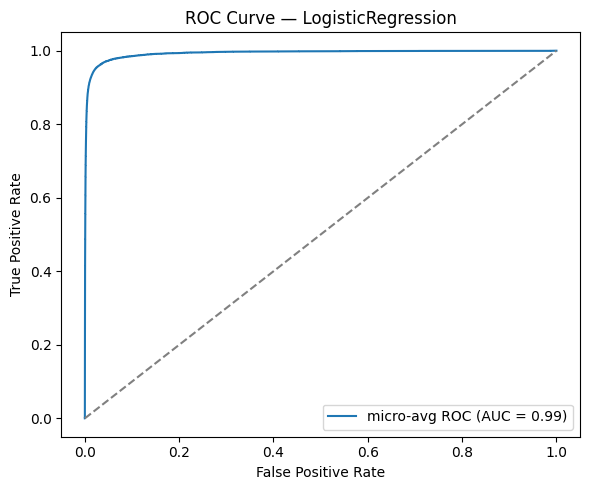

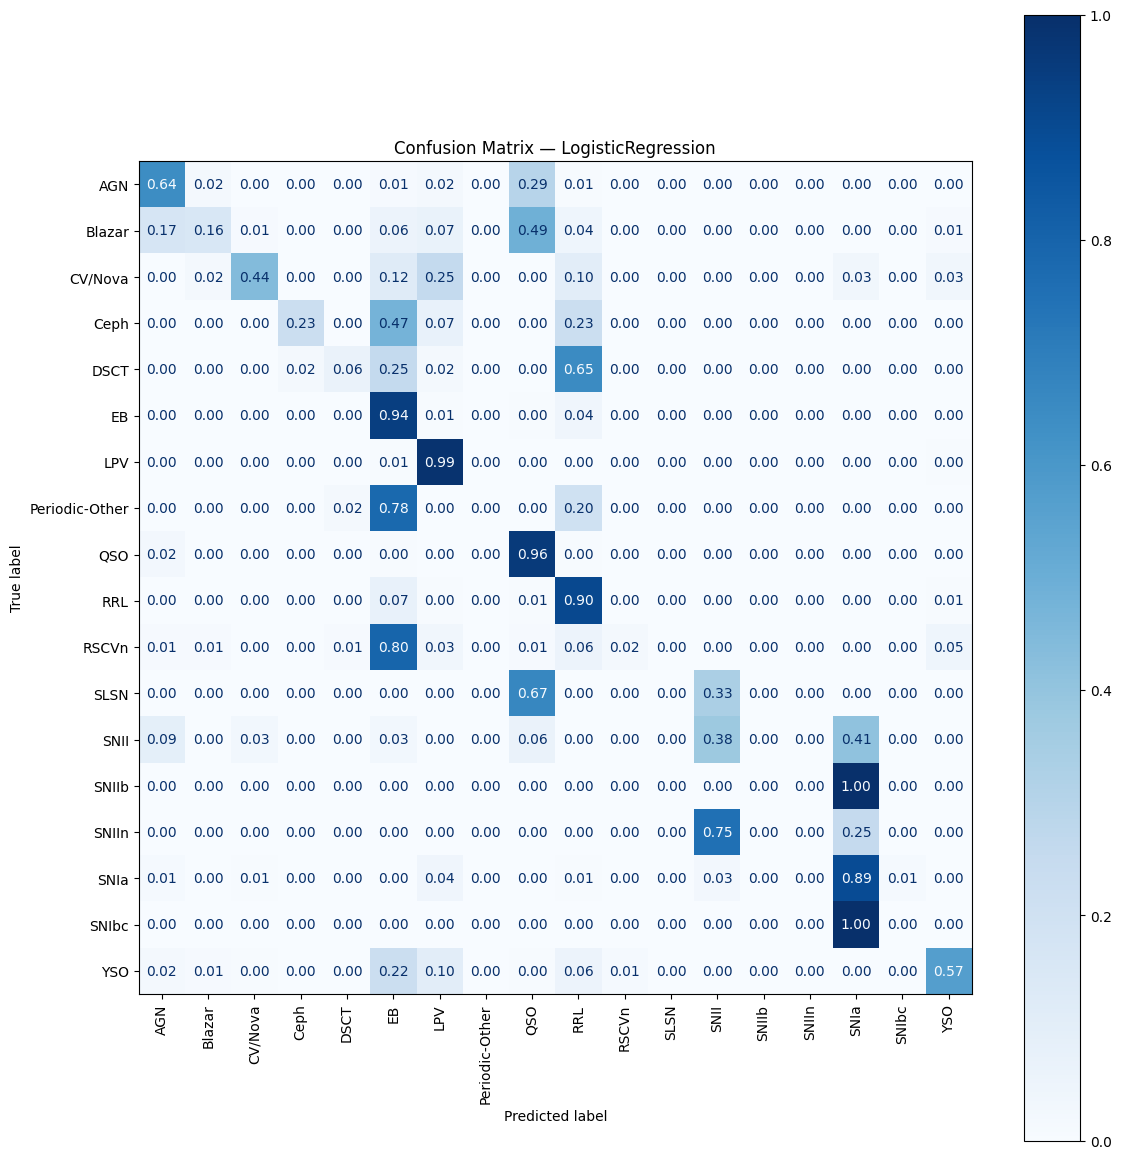

micro — Precision: 0.888, Recall: 0.888, F1: 0.888
macro — Precision: 0.501, Recall: 0.426, F1: 0.446
      — Accuracy:  0.888

=== RandomForest ===


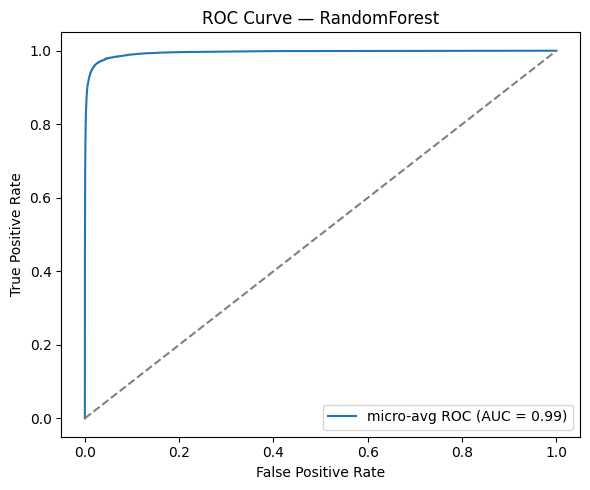

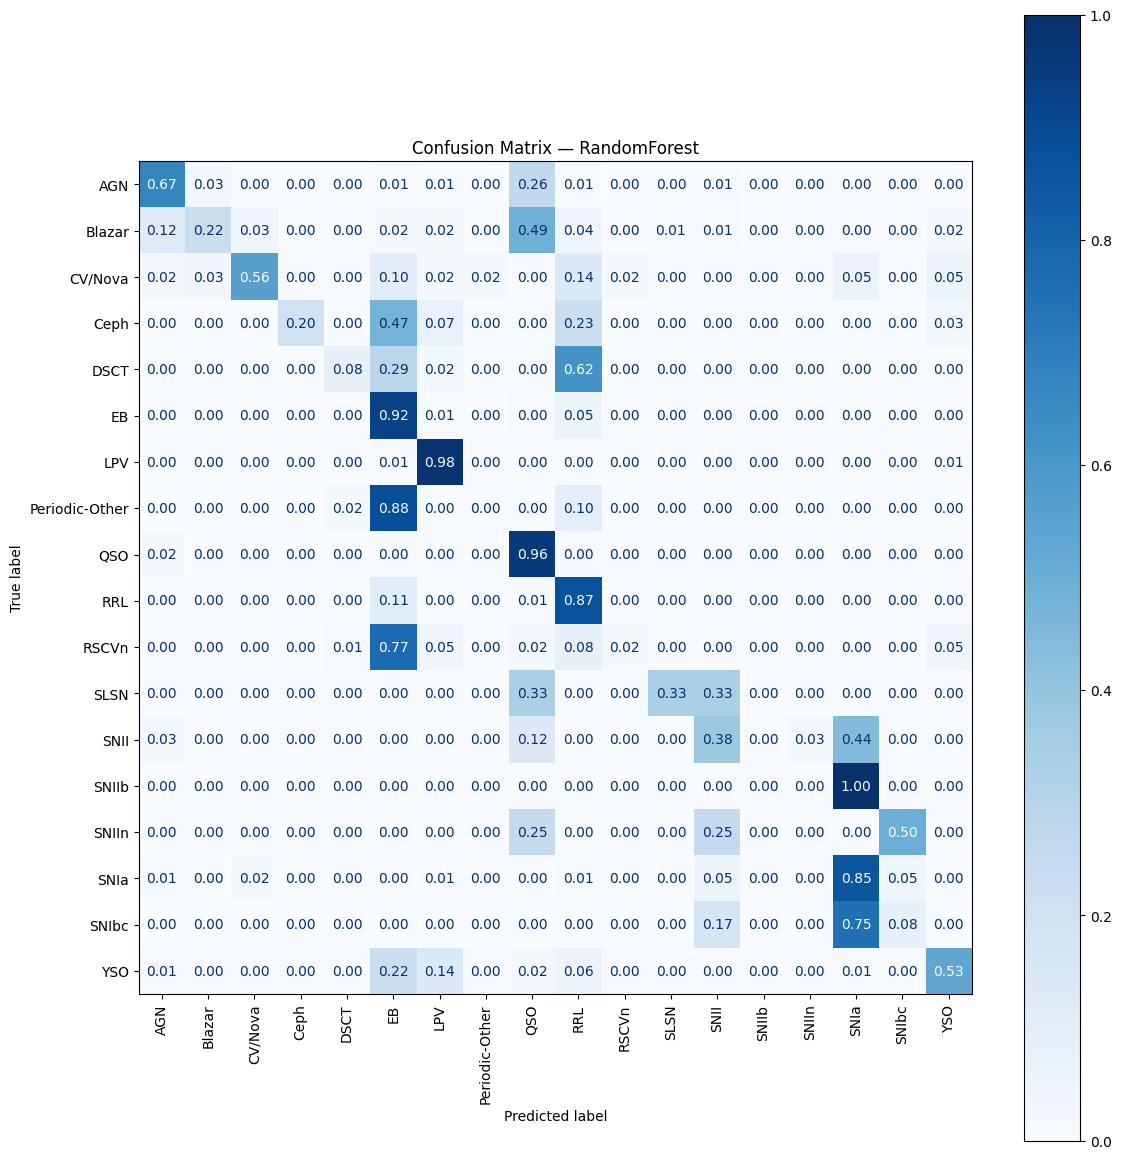

micro — Precision: 0.904, Recall: 0.904, F1: 0.904
macro — Precision: 0.605, Recall: 0.381, F1: 0.423
      — Accuracy:  0.904

=== SVC ===


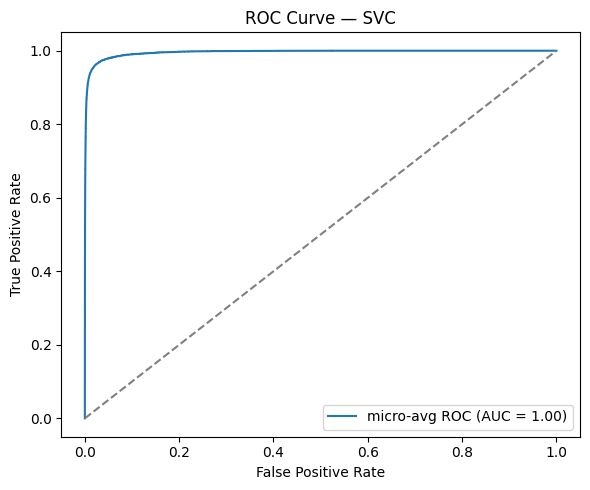

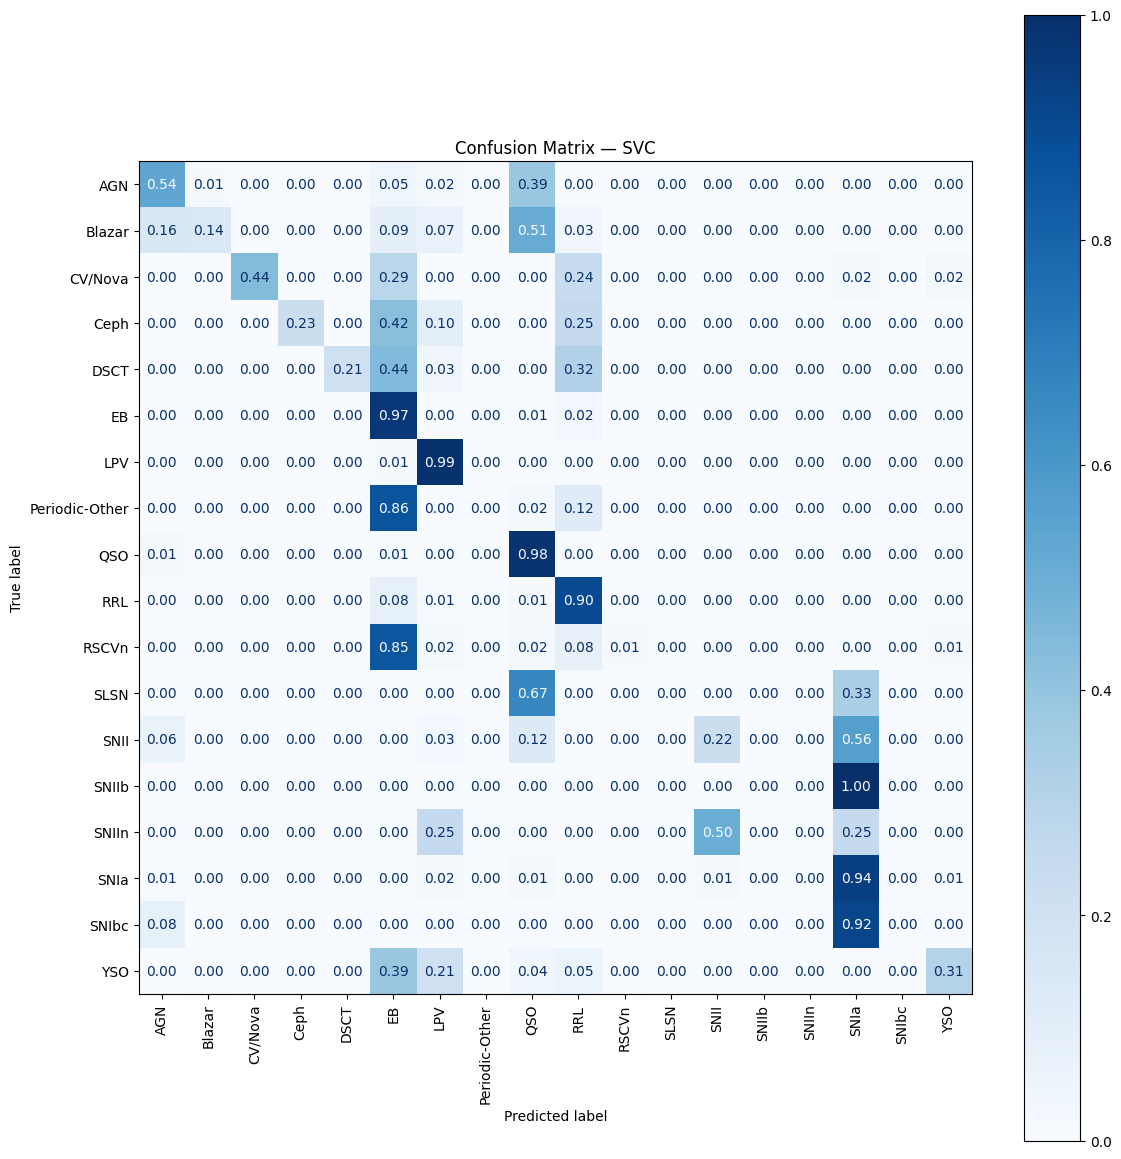

micro — Precision: 0.901, Recall: 0.901, F1: 0.901
macro — Precision: 0.505, Recall: 0.399, F1: 0.426
      — Accuracy:  0.901


In [60]:
from sklearn.metrics import (
    roc_curve, auc, RocCurveDisplay,
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.preprocessing import label_binarize

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

for name, est in best_estimators.items():
    print(f"\n=== {name} ===")
    
    # --- a) ROC curve (micro-average) ---
    # Necesitamos las probabilidades
    y_score = est.predict_proba(X_test)
    
    # micro-average ROC
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'micro-avg ROC (AUC = {roc_auc:.2f})')
    plt.plot([0,1], [0,1], '--', color='gray')
    plt.title(f'ROC Curve — {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
    
    cm_norm = confusion_matrix(
        y_test, y_pred,
        labels=classes,
        normalize='true'     # 'true' normaliza por filas; usa 'pred' o 'all' para otras normalizaciones
    )

    # --- b) Confusion matrix ---
    y_pred = est.predict(X_test)
    disp = ConfusionMatrixDisplay(cm_norm, display_labels=classes)
    fig, ax = plt.subplots(figsize=(12,12))
    disp.plot(ax=ax, cmap='Blues', xticks_rotation=90, values_format='.2f')
    plt.title(f'Confusion Matrix — {name}')
    plt.tight_layout()
    plt.show()
    
    # Observación rápida:
    #   si ves filas muy desbalanceadas o muchos falsos negativos en alguna clase,
    #   podría indicar sesgo o necesidad de reequilibrar.

    # --- c) Métricas micro y macro ---
    for avg in ['micro','macro']:
        acc   = accuracy_score(y_test,     y_pred)  # accuracy no varía con average
        prec  = precision_score(y_test,    y_pred, average=avg, zero_division=0)
        rec   = recall_score(y_test,       y_pred, average=avg, zero_division=0)
        f1    = f1_score(y_test,           y_pred, average=avg, zero_division=0)
        print(f"{avg:>5} — Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")
    print(f"      — Accuracy:  {acc:.3f}")

Notemos que el rendimiento entre los 3 modelos fue relativamente similar, con el RandomForest presentado las mejores métricas a nivel micro. Sin embargo, a nivel macro vemos que el rendimiento empeora drásticamente para los 3 modelos. Esto es debido a las clases raras, como por ejemplo SNII, SNIbc o NLQSO. El modelo aprende bien a distinguir entre las clases más balanceadas, sin embargo, confunde las más escasas entre sí. Nuevamente, debido a que las clases con problemas son una minoría, el modelo en general presenta buenos resultados, esto se puede apreciar en al curva ROC, pero si nos fijamos en las clases raras en las matrices de confusión podremos observar el pobre rendimiento de los modelos para estas, esto se aprecia directamente en el bajo recall.

Estos problemas NO son por los modelos o la forma de entrenar, sino por los datos. Cuando se tienen datos desequilibrados hay que tomar medidas como darle más peso a las clases raras, crear datos sintéticos para estas, ajustar y entrenar modelos especializados para estas clases raras o ajustar los umbrales.